# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from scipy import stats as st
import os
import joblib
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd



In [4]:
# installing the custom package

! pip install --extra-index https://test.pypi.org/simple/ doombuoy

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/


---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
The goal of this project is to develop a predictive model that accurately forecasts the cumulative precipitation volume (in mm) 
for the next 3 days in Sydney. This will enable businesses and individuals to make informed decisions related to weather-sensitive 
activities, such as agriculture, event planning, logistics, and infrastructure management, improving operational efficiency and 
reducing risks associated with unexpected weather conditions.
"""


In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
Impact of Accurate Results:

Increased Trust: Accurate predictions will enhance user trust in the service, leading to higher adoption and customer satisfaction.
Operational Efficiency: Businesses can optimize operations, reducing costs and improving decision-making for weather-sensitive 
activities.
Revenue Growth: Accurate forecasts enable premium pricing for services and provide a competitive edge in the market.
Impact of Incorrect Results:

Reputation Damage: Inaccurate predictions can harm the credibility of the service provider, leading to customer churn.
Financial Losses: Businesses relying on forecasts may face losses due to poor planning (e.g., crop damage, event cancellations, 
or logistics delays).
Safety Risks: Incorrect predictions may lead to safety hazards for industries like construction and transportation.

Hypothesis:
“Advanced machine learning models (such as CatBoost, GradientBoosting, and LightGBM) can predict the cumulative 3-day precipitation in Sydney with significantly 
better accuracy than a baseline model, providing actionable insights for weather-sensitive business decisions.”
"""


In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?

How will the results be used?

Real-time API calls for immediate weather-related decisions.
Daily/weekly forecasts for operational and strategic planning.
Integration into business systems, dashboards, and mobile applications for seamless decision-making.
Who will be the users of your predictions?

Farmers: For irrigation scheduling and crop management.
Event Planners: For outdoor event planning and venue selection.
Logistics Companies: For route optimization and delivery scheduling.
Construction Firms: For project planning and ensuring worker safety.
Who will be impacted by your predictions?

Farmers: Crop yield and financial outcomes depend on accurate irrigation timing.
Event Planners: Revenue and customer satisfaction are affected by weather disruptions.
Logistics Companies: Operational efficiency and costs are influenced by weather conditions.
Construction Firms: Worker safety and project timelines are at risk due to adverse weather.
General Public: Daily activities and safety are impacted by weather predictions.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.0   Download Dataset


In [14]:
# # Run this cell to make data directory and download dataset if not already done.
# ! cd ../../
# ! python -m ml_as_api.dataset

### C.1   Load Datasets


In [15]:
# <Student to fill this section>
df=pd.read_csv(r'../../data\raw\weather_data.csv')
df.head()

,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,...,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_7_to_28cm_mean,soil_temperature_28_to_100cm_mean
0,2009-12-31 14:00:00+00:00,53.0,22.964250,25.670502,21.070500,25.151611,26.715890,24.240880,18.581022,35.640000,...,19.931772,1.047818,0.120040,0.181667,0.093000,0.192208,22.152273,23.003832,22.655916,21.922585
1,2010-01-01 14:00:00+00:00,63.0,23.612165,26.920502,20.970500,26.942467,32.614998,22.179842,15.584300,37.440000,...,19.692732,1.030170,0.122225,0.220250,0.093000,0.189750,22.497442,24.720497,23.605917,21.958000
2,2010-01-02 14:00:00+00:00,51.0,19.882996,20.620499,19.470500,19.709002,21.280840,19.180962,18.345877,37.440000,...,15.879213,0.835103,0.123362,0.223417,0.093833,0.191250,22.132751,21.326750,22.643415,22.062164
3,2010-01-03 14:00:00+00:00,51.0,20.887167,22.520500,19.220500,21.016272,22.343325,19.466248,16.870138,37.440000,...,15.985977,0.959982,0.121697,0.202292,0.094000,0.189792,21.884003,21.845499,21.678835,21.947586
4,2010-01-04 14:00:00+00:00,3.0,22.520498,26.020500,18.620499,24.393919,30.018890,19.811030,17.477621,39.239998,...,16.724476,1.298432,0.118544,0.175625,0.094000,0.183667,22.143875,23.745499,22.583000,21.860079


### C.1.1  Explore Datasets


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               5479 non-null   object 
 1   weather_code                       5479 non-null   float64
 2   temperature_2m_mean                5479 non-null   float64
 3   temperature_2m_max                 5479 non-null   float64
 4   temperature_2m_min                 5479 non-null   float64
 5   apparent_temperature_mean          5479 non-null   float64
 6   apparent_temperature_max           5479 non-null   float64
 7   apparent_temperature_min           5479 non-null   float64
 8   wind_speed_10m_max                 5479 non-null   float64
 9   wind_gusts_10m_max                 5479 non-null   float64
 10  wind_direction_10m_dominant        5479 non-null   float64
 11  shortwave_radiation_sum            5479 non-null   float

The dataset consists of 5,479 entries with 55 features in total. It includes 52 columns of type float64, 2 columns of type int64, and 1 column of type object.

#### Lets check for outliers

In [17]:

# Identify outliers in numeric columns using IQR and Z-score methods
def detect_outliers_iqr(df, cols=None, k=1.5):
    """
    Returns a boolean DataFrame (same index/cols) where True indicates an outlier per IQR rule:
    value < Q1 - k*IQR or value > Q3 + k*IQR
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c].dropna()
        if series.empty:
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        out.loc[:, c] = (df[c] < lower) | (df[c] > upper)
    return out

def detect_outliers_zscore(df, cols=None, thresh=3.0):
    """
    Returns a boolean DataFrame where True indicates |(x - mean)/std| > thresh.
    Uses population std (ddof=0) to be conservative; ignores NaNs.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c]
        if series.dropna().shape[0] < 2:
            continue
        mu = series.mean()
        sigma = series.std(ddof=0)
        if sigma == 0 or np.isnan(sigma):
            continue
        z = (series - mu) / sigma
        out[c] = z.abs() > thresh
    return out

# Example usage: compute and summarize outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('precipitation_sum_next_4_days', errors='ignore').tolist()

iqr_out = detect_outliers_iqr(df, cols=numeric_cols, k=1.5)
z_out = detect_outliers_zscore(df, cols=numeric_cols, thresh=3.0)

# combine (True if flagged by either method)
outlier_flags = iqr_out | z_out

# summary counts per column and percent
outlier_counts = outlier_flags.sum().sort_values(ascending=False)
outlier_pct = (outlier_counts / len(df) * 100).round(3)
out_summary = pd.DataFrame({'count': outlier_counts, 'pct': outlier_pct})
display(out_summary[out_summary['count'] > 0])

# rows that have any outlier
rows_with_outliers = outlier_flags.any(axis=1)
print(f"Rows with any outlier: {rows_with_outliers.sum()} / {len(df)} ({rows_with_outliers.mean()*100:.2f}%)")

# show a few example rows with outliers and which cols are flagged
if rows_with_outliers.any():
    sample_idx = df.index[rows_with_outliers][:10]
    display(pd.concat([df.loc[sample_idx, numeric_cols], outlier_flags.loc[sample_idx, numeric_cols].astype(int)],
                      keys=['values','outlier_flag'], axis=1))


,count,pct
cloud_cover_max,864,15.769
precipitation_sum,808,14.747
rain_sum,808,14.747
cloud_cover_min,626,11.425
sunshine_duration,486,8.870
precipitation_hours,384,7.009
wind_gusts_10m_min,328,5.986
vapour_pressure_deficit_max,312,5.694
wind_speed_10m_min,239,4.362
relative_humidity_2m_max,203,3.705


Rows with any outlier: 2537 / 5479 (46.30%)


values                                                            \
   weather_code temperature_2m_mean temperature_2m_max temperature_2m_min   
0          53.0           22.964250          25.670502          21.070500   
1          63.0           23.612165          26.920502          20.970500   
2          51.0           19.882996          20.620499          19.470500   
6           3.0           21.364248          23.070500          19.620499   
9           1.0           24.451752          27.320500          21.270500   
11         51.0           25.524672          30.370499          21.170502   
13          3.0           21.370500          22.720500          19.920502   
14         51.0           22.070498          23.420502          21.120499   
16         63.0           22.037169          25.320500          19.070500   
18          0.0           20.176750          23.970500          15.970500   

                                                       \
   apparent_temperature_mean apparent_temperature_max   
0                  25.151611                26.715890   
1                  26.942467                32.614998   
2                  19.709002                21.280840   
6                  21.611094                23.130701   
9                  26.600761                30.870040   
11                 28.837305                35.924774   
13                 21.535097                23.054485   
14                 23.728148                24.893555   
16                 23.796270                29.362179   
18                 19.526289                25.340685   

                                                                   \
   apparent_temperature_min wind_speed_10m_max wind_gusts_10m_max   
0                 24.240880          18.581022          35.640000   
1                 22.179842          15.584300          37.440000   
2                 19.180962          18.345877          37.440000   
6                 20.034603          14.904173          32.760002   
9                 23.076862          18.720001          41.399998   
11                23.731840          18.864824          38.519997   
13                19.490849          19.211996          38.519997   
14                22.689213          14.408997          32.039997   
16                19.383911          18.359999          49.320000   
18                14.406509          11.019764          24.840000   

                                ...                outlier_flag  \
   wind_direction_10m_dominant  ... wet_bulb_temperature_2m_min   
0                    331.64750  ...                           0   
1                    298.61030  ...                           0   
2                    146.74464  ...                           0   
6                    147.25504  ...                           0   
9                    159.51851  ...                           0   
11                    37.02098  ...                           0   
13                   165.63329  ...                           0   
14                   138.62370  ...                           0   
16                   166.73466  ...                           0   
18                   262.25370  ...                           0   

                                                              \
   vapour_pressure_deficit_max soil_moisture_0_to_100cm_mean   
0                            0                             0   
1                            0                             0   
2                            0                             0   
6                            0                             0   
9                            0                             0   
11                           0                             0   
13                           0                             0   
14                           0                             0   
16                           0                             0   
18                           0                             0 

Approximately 46% of the rows contain outliers in one or more columns. These outliers will be addressed during the data cleaning process.

### C.2 Define Target variable

First, we will convert the target column into a right format.
we need to calculate the rolling sum for the next 4 days (including today and the next three days)

Assumptions: 
- within precipitation within 3 days meaning today and next 3 days
- taking precipitation upto 1 deciaml places

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

# Custom transformer to calculate rolling cumulative sum for the next 4 days
class RollingCumulativeSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name='precipitation_sum', new_column_name='precipitation_sum_next_4_days', window=4):
        self.column_name = column_name
        self.new_column_name = new_column_name
        self.window = window

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X = X.sort_values(by='date')  # Ensure DataFrame is sorted by date
        # Calculate rolling sum for the next 4 days (including today)
        X[self.new_column_name] = (
            X[self.column_name]
            .rolling(window=self.window, min_periods=1)  # Rolling sum over the window
            .sum()
            .shift(-(self.window - 1))  # Shift to align with the next 4 days
        ).round(1)  # Round to 1 decimal place
        return X
# Custom transformer to remove the last N rows
class RemoveLastRowsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows_to_remove=4):
        self.rows_to_remove = rows_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Remove the last `rows_to_remove` rows
        X = X.iloc[:-self.rows_to_remove]
        return X

# Define the pipeline with a unique name
Make_target_pipeline = Pipeline(steps=[
    ('rolling_cumulative_sum', RollingCumulativeSumTransformer(column_name='precipitation_sum', new_column_name='precipitation_sum_next_4_days', window=4)),
    ('remove_last_rows', RemoveLastRowsTransformer(rows_to_remove=3))  # Adjust to remove rows with NaN after rolling
])

# Apply the pipeline
df = Make_target_pipeline.fit_transform(df)

# Display the transformed DataFrame
print(df[['precipitation_sum', 'precipitation_sum_next_4_days']].head(10))

   precipitation_sum  precipitation_sum_next_4_days
0                3.9                           14.2
1                8.6                           10.3
2                1.1                            1.7
3                0.6                            0.6
4                0.0                            0.5
5                0.0                            0.5
6                0.0                            0.5
7                0.5                            0.5
8                0.0                            0.3
9                0.0                            1.2


In [19]:
df.shape

(5476, 56)

In [20]:
# <Student to fill this section>
target_definition_explanations = """
`Explain the rationale on the definition of the target variable according to your business use case.
`
The target variable precipitation_sum_next_4_days is defined to predict the cumulative 
rainfall over the next three days, aligning with the business need to provide actionable 
insights for weather-sensitive activities like agriculture, logistics, and event planning. 
This ensures decisions are based on short-term, accurate precipitation forecasts.


"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [22]:
# <Student to fill this section>
# Create continuous target variable for precipitation prediction

target_name = 'precipitation_sum_next_4_days'
target_variable=df[target_name]

### C.4 Explore Target variable

In [23]:
# <Student to fill this section>
target_variable.head()

0    14.2
1    10.3
2     1.7
3     0.6
4     0.5
Name: precipitation_sum_next_4_days, dtype: float64

In [24]:
target_variable.describe()

count    5476.000000
mean        9.699233
std        17.887481
min         0.000000
25%         0.500000
50%         3.200000
75%        10.900000
max       224.800000
Name: precipitation_sum_next_4_days, dtype: float64

In [25]:
target_variable.isnull().sum()

np.int64(0)

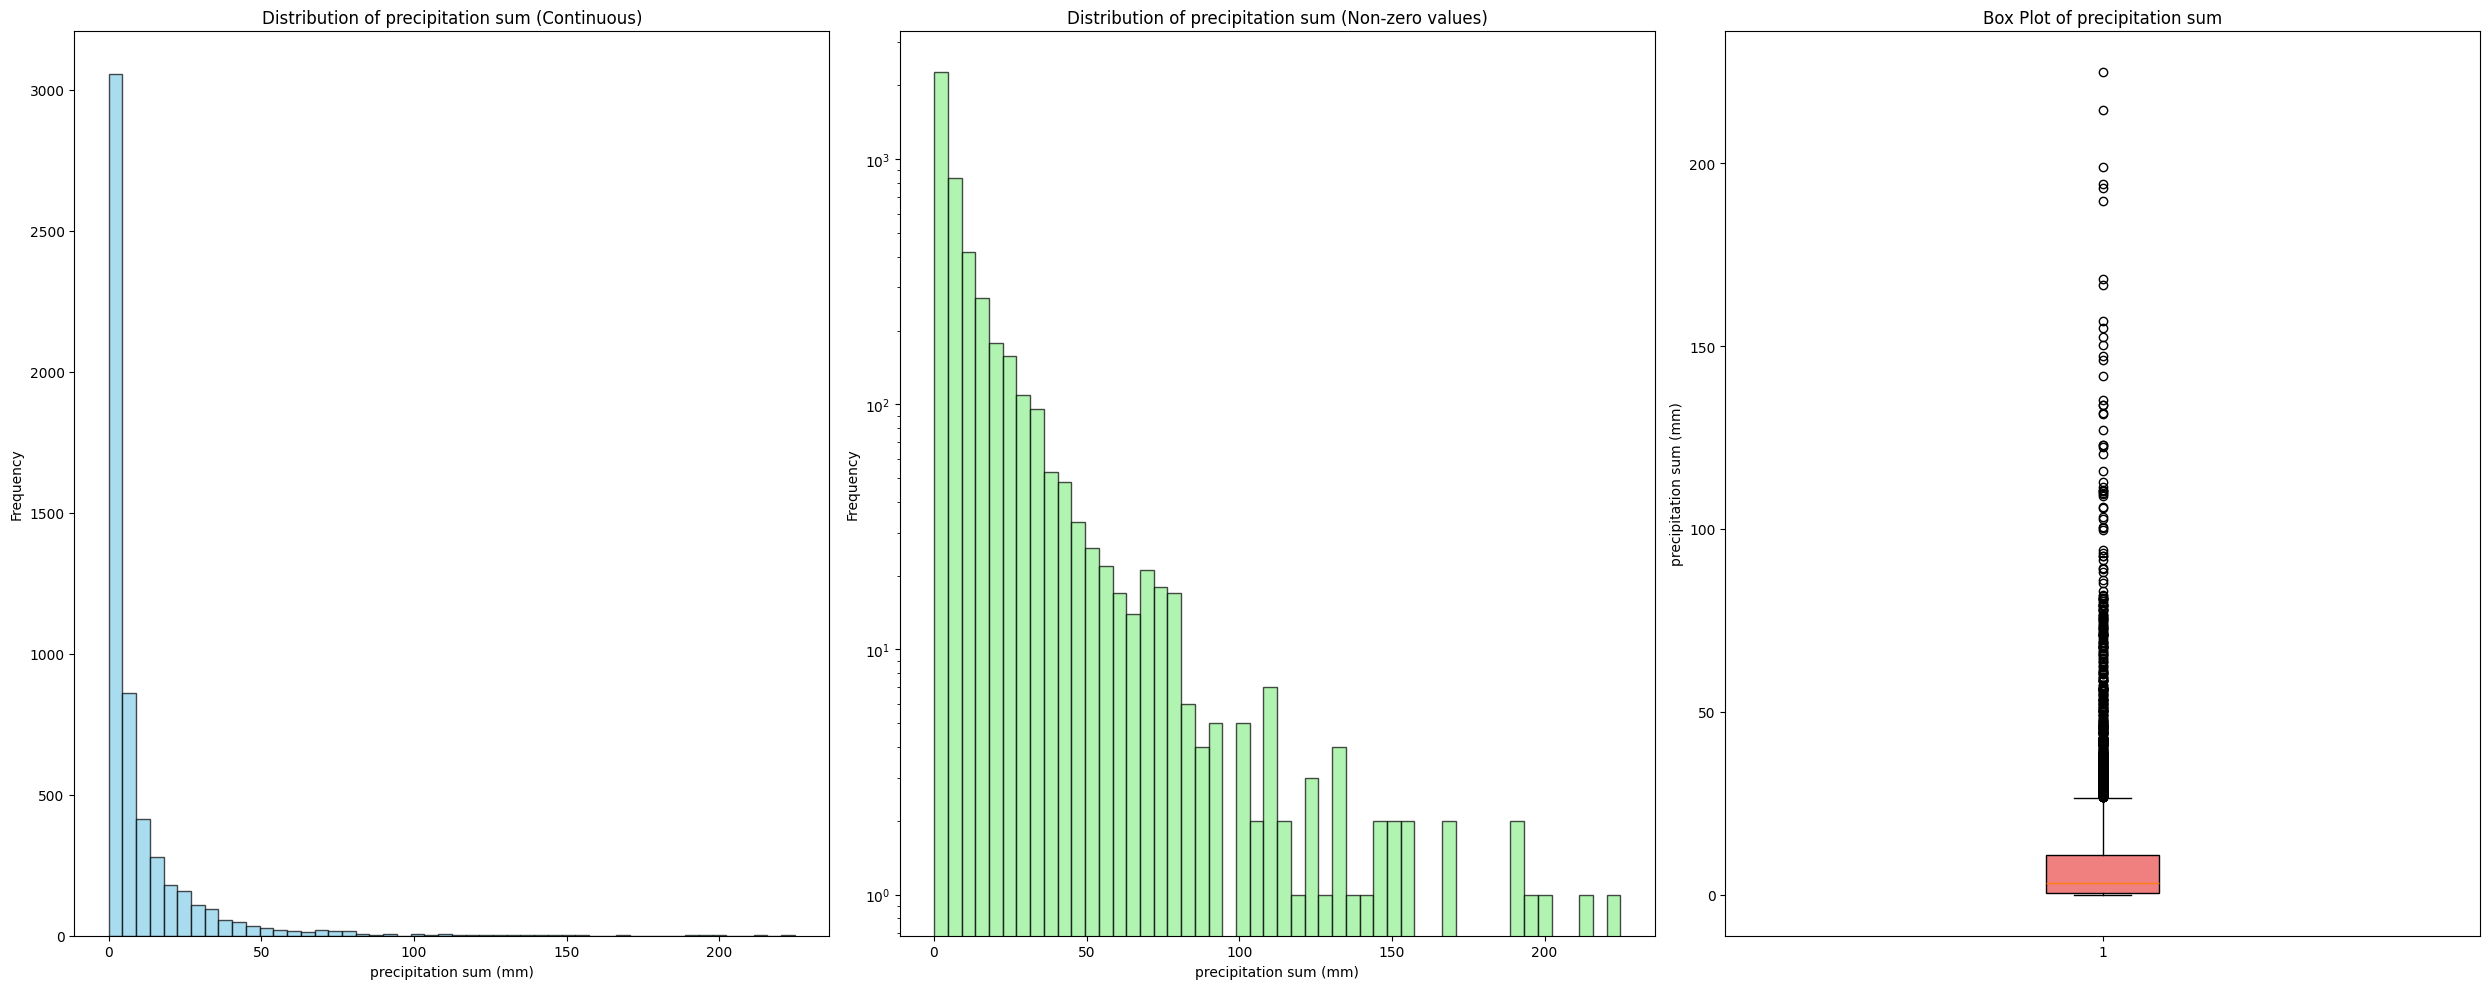

In [26]:
# Visualize the target variable distribution
plt.figure(figsize=(25, 10))

# 1. Distribution of precipitation_sum_next_4_days (continuous)
plt.subplot(1, 3, 1)
plt.hist(df['precipitation_sum_next_4_days'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of precipitation sum (Continuous)')
plt.xlabel('precipitation sum (mm)')
plt.ylabel('Frequency')

# 2. Distribution of precipitation_sum_next_4_days (log scale for better visualization)
plt.subplot(1, 3, 2)
precipitation_nonzero = df[df['precipitation_sum_next_4_days'] > 0]['precipitation_sum_next_4_days']
plt.hist(precipitation_nonzero, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of precipitation sum (Non-zero values)')
plt.xlabel('precipitation sum (mm)')
plt.ylabel('Frequency')
plt.yscale('log')

# 3. Box plot of precipitation_sum_next_4_days
plt.subplot(1, 3, 3)
plt.boxplot(df['precipitation_sum_next_4_days'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of precipitation sum')
plt.ylabel('precipitation sum (mm)')

plt.tight_layout()
plt.show()

The target column is right skewed 

Lets visualize precipitation_sum column as well for better understanding

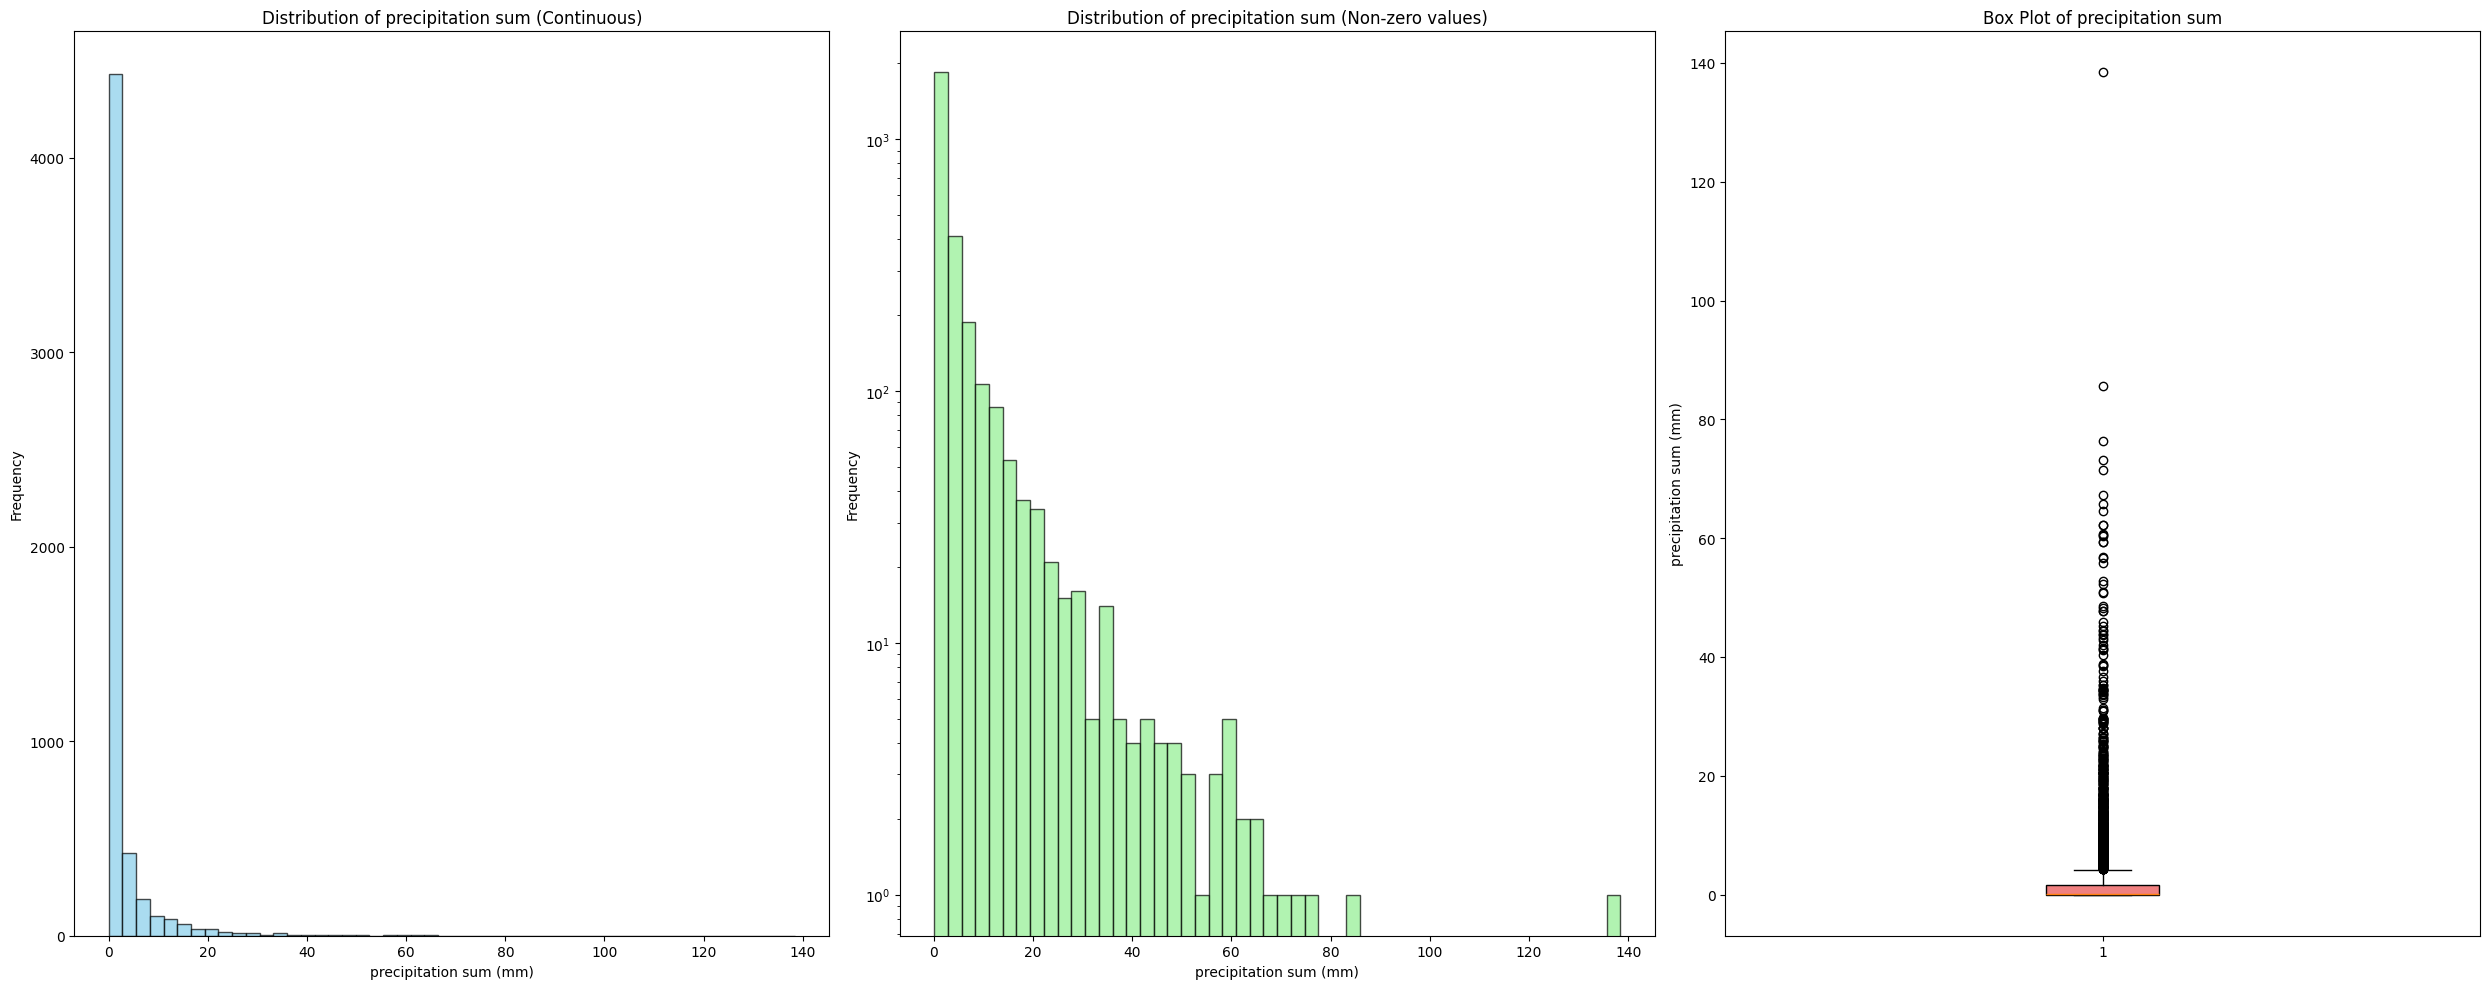

In [26]:
# Visualize the target variable distribution
plt.figure(figsize=(25, 10))

# 1. Distribution of precipitation_sum (continuous)
plt.subplot(1, 3, 1)
plt.hist(df['precipitation_sum'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of precipitation sum (Continuous)')
plt.xlabel('precipitation sum (mm)')
plt.ylabel('Frequency')

# 2. Distribution of precipitation_sum (log scale for better visualization)
plt.subplot(1, 3, 2)
precipitation_nonzero = df[df['precipitation_sum'] > 0]['precipitation_sum']
plt.hist(precipitation_nonzero, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of precipitation sum (Non-zero values)')
plt.xlabel('precipitation sum (mm)')
plt.ylabel('Frequency')
plt.yscale('log')

# 3. Box plot of precipitation_sum
plt.subplot(1, 3, 3)
plt.boxplot(df['precipitation_sum'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of precipitation sum')
plt.ylabel('precipitation sum (mm)')

plt.tight_layout()
plt.show()

- **Binary Target Conversion**: The `precipitation_sum_next_4_days` column effectively captures rain/no-rain events based on `precipitation_sum > 0`. This binary classification simplifies the prediction task while retaining the key information about rainfall occurrence.
- **Rain Distribution**: The precipitation data is highly skewed, with the majority of values clustered near zero and a long tail representing heavy rainfall events. This skewness highlights the need for appropriate transformations or handling techniques to improve model performance.
- **Outliers**: Significant outliers in the `precipitation_sum` column may distort model training and evaluation. These outliers could result from extreme weather events or data collection errors and should be addressed through capping, removal, or transformation during preprocessing.

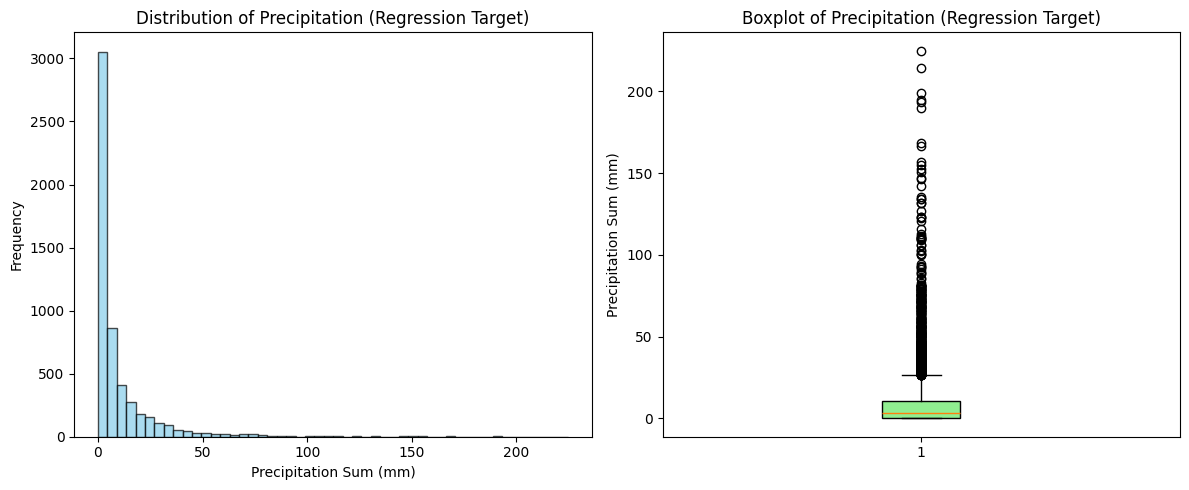

=== REGRESSION TARGET ANALYSIS ===
Total observations: 5476
Mean precipitation: 9.70 mm
Median precipitation: 3.20 mm
Standard deviation: 17.89 mm
Minimum precipitation: 0.00 mm
Maximum precipitation: 224.80 mm


In [27]:
plt.figure(figsize=(12, 5))

# 1. Histogram of the regression target (precipitation_sum_next_4_days)
plt.subplot(1, 2, 1)
plt.hist(df['precipitation_sum_next_4_days'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Precipitation (Regression Target)')
plt.xlabel('Precipitation Sum (mm)')
plt.ylabel('Frequency')

# 2. Boxplot of the regression target
plt.subplot(1, 2, 2)
plt.boxplot(df['precipitation_sum_next_4_days'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Precipitation (Regression Target)')
plt.ylabel('Precipitation Sum (mm)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== REGRESSION TARGET ANALYSIS ===")
print(f"Total observations: {len(df)}")
print(f"Mean precipitation: {df['precipitation_sum_next_4_days'].mean():.2f} mm")
print(f"Median precipitation: {df['precipitation_sum_next_4_days'].median():.2f} mm")
print(f"Standard deviation: {df['precipitation_sum_next_4_days'].std():.2f} mm")
print(f"Minimum precipitation: {df['precipitation_sum_next_4_days'].min():.2f} mm")
print(f"Maximum precipitation: {df['precipitation_sum_next_4_days'].max():.2f} mm")

In [28]:

# find rows where precipitation_sum == 0.1 (use np.isclose to avoid floating point issues)
mask = np.isclose(df['precipitation_sum'], 0.1)
count = int(mask.sum())
pct = mask.mean() * 100

print(f"Rows with precipitation_sum ≈ 0.1: {count} ({pct:.3f}%)")
# show a few examples
display(df.loc[mask])  # or: print(df.loc[mask].head().to_string())


Rows with precipitation_sum ≈ 0.1: 239 (4.364%)


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,...,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_7_to_28cm_mean,soil_temperature_28_to_100cm_mean,precipitation_sum_next_4_days
49,2010-02-18 14:00:00+00:00,51.0,21.643412,23.370499,19.820500,22.353836,24.020819,21.023912,12.074766,32.399998,...,1.232203,0.197856,0.196958,0.189625,0.226375,22.963020,22.597582,22.566332,23.114248,0.1
56,2010-02-25 14:00:00+00:00,51.0,21.535082,23.820500,18.020500,22.200228,24.420424,18.869154,12.303366,33.480000,...,1.314471,0.174034,0.108250,0.181667,0.169792,22.965227,22.624670,22.539248,23.122581,11.1
122,2010-05-02 14:00:00+00:00,51.0,19.374664,21.670502,17.370499,19.749865,22.109283,17.337970,10.440000,24.119999,...,0.951230,0.137937,0.131250,0.141000,0.129667,19.567377,19.276750,19.239248,19.691332,4.0
203,2010-07-22 14:00:00+00:00,51.0,12.382999,14.670500,10.270500,10.749743,12.751032,8.230516,11.874544,33.839996,...,0.500295,0.206690,0.218458,0.203000,0.215417,13.054023,12.141335,12.251751,13.376752,6.2
294,2010-10-21 14:00:00+00:00,51.0,18.912165,23.020500,14.420500,19.798048,25.151041,14.913652,12.287555,25.199999,...,1.170170,0.160169,0.120542,0.166417,0.151958,17.591396,20.366333,18.830915,16.960085,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,2024-08-16 14:00:00+00:00,51.0,14.983334,18.887499,11.837500,12.148898,16.001570,8.595513,22.734219,39.239998,...,1.244478,0.217342,0.228625,0.208458,0.244042,14.035980,14.954165,14.860414,13.706252,0.8
5369,2024-09-12 14:00:00+00:00,51.0,13.654167,16.887499,9.787499,10.796597,14.605371,7.685010,25.620771,43.560000,...,0.852102,0.120242,0.081292,0.134125,0.085625,16.432877,15.674998,16.612500,16.454168,0.3
5423,2024-11-05 14:00:00+00:00,51.0,21.275000,27.037500,15.587500,22.486908,30.358974,16.526623,21.522614,38.519997,...,1.384133,0.089714,0.084417,0.088542,0.095500,19.592272,23.495832,21.514582,18.652082,10.4
5438,2024-11-20 14:00:00+00:00,51.0,19.695833,23.487500,16.287500,19.749876,24.500820,17.540833,19.987295,46.440000,...,1.463975,0.162415,0.073750,0.176625,0.143250,19.802816,21.756250,20.554169,19.393753,0.2


In [29]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...


Summary

Target: precipitation_sum_next_4_days is a continuous variable representing the cumulative precipitation (in mm) over the next 4 days. No nulls. 
Total = 5,476 observations.

Distribution

Continuous: The distribution is highly right-skewed, with most values clustered near zero and a long tail representing heavy rainfall events.
The skewness highlights the dominance of small or no precipitation values, with occasional extreme rainfall events contributing to the long tail.
Limitations / Issues

Skewness: The strong right-skewness may impact model performance, requiring transformations (e.g., log1p) to stabilize variance and improve 
predictions.
Outliers: Extreme rainfall values may distort model training and evaluation. These outliers should be addressed through capping, removal, or 
transformation.
Interpretability: While the continuous target retains rainfall intensity information, it may require careful handling to ensure predictions are 
meaningful for business use cases.
"""


In [30]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `wind_direction_10m_dominant`

In [31]:
# <Student to fill this section>
df.wind_direction_10m_dominant.head()

0    331.647500
1    298.610300
2    146.744640
3     69.884770
4     35.137077
Name: wind_direction_10m_dominant, dtype: float64

In [32]:
df.wind_direction_10m_dominant.isnull().sum()

np.int64(0)

There are no null values

In [33]:
df.wind_direction_10m_dominant.describe()

count    5476.000000
mean      180.703427
std       103.379173
min         0.100737
25%        83.032664
50%       182.787415
75%       272.059395
max       359.857450
Name: wind_direction_10m_dominant, dtype: float64

Wind Directions:

Divided into 16 compass directions:
Principal: N, E, S, W
Ordinal: NE, SE, SW, NW
Inter-ordinal: NNE, ENE, ESE, etc.

In [34]:
# Define a custom transformer for wind direction compass binning
class WindDirectionCompassTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_column='wind_direction_10m_dominant', 
                 degree_column='wind_direction_10m_dominant_deg', 
                 compass_column='wind_dir_compass'):
        self.input_column = input_column
        self.degree_column = degree_column
        self.compass_column = compass_column
        self.dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                     'S','SSW','SW','WSW','W','WNW','NW','NNW']

    def deg_to_compass(self, deg):
        """Convert degrees to 16-point compass direction"""
        try:
            deg = float(deg)
        except Exception:
            return np.nan
        idx = int(((deg + 11.25) % 360) / 22.5)
        return self.dirs[idx]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # Check if input column exists
        if self.input_column not in X.columns:
            raise KeyError(f"Column '{self.input_column}' not found in input data.")
        
        # Convert to numeric (handles strings/missing values)
        X[self.degree_column] = pd.to_numeric(X[self.input_column], errors='coerce')
        
        # Apply compass conversion
        X[self.compass_column] = X[self.degree_column].apply(
            lambda x: self.deg_to_compass(x) if not pd.isna(x) else np.nan
        )
        
        return X

# Create the pipeline
wind_direction_pipeline = Pipeline(steps=[
    ('wind_direction_compass', WindDirectionCompassTransformer(
        input_column='wind_direction_10m_dominant',
        degree_column='wind_direction_10m_dominant_deg',
        compass_column='wind_dir_compass'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = wind_direction_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    
    # Display quick check
    display(df[['wind_direction_10m_dominant', 'wind_direction_10m_dominant_deg', 'wind_dir_compass']].head())
    print("\nCompass direction value counts:")
    print(df['wind_dir_compass'].value_counts(dropna=False))
    
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:


,wind_direction_10m_dominant,wind_direction_10m_dominant_deg,wind_dir_compass
0,331.647500,331.647500,NNW
1,298.610300,298.610300,WNW
2,146.744640,146.744640,SSE
3,69.884770,69.884770,ENE
4,35.137077,35.137077,NE



Compass direction value counts:
wind_dir_compass
NE     529
S      493
SSE    436
WNW    418
W      406
SSW    405
NNE    364
NW     357
ENE    300
NNW    297
WSW    280
SW     279
N      265
SE     244
E      209
ESE    194
Name: count, dtype: int64


The majority of entries are concentrated in the directions NE, S, SSE, WNW, W, and SSW, each exceeding 400 observations.

Lets visualize it

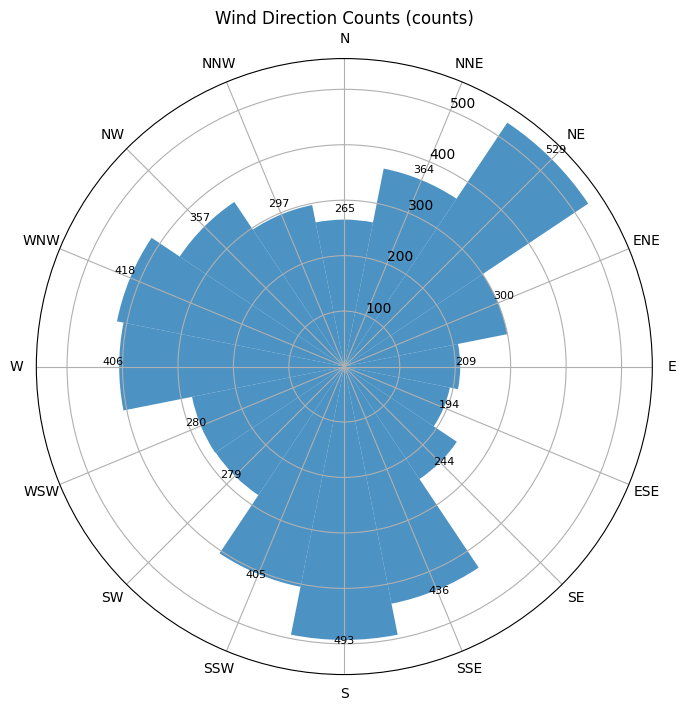

In [35]:
def deg_to_compass(deg):
    try:
        deg = float(deg)
    except Exception:
        return np.nan
    dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW']
    # map to [0,360) and pick bin by center offsets
    idx = int(((deg + 11.25) % 360) / 22.5)
    return dirs[idx]

def create_direction_count(df, normalize=False, colors=None):
    """
    Count wind directions by 16 compass bins and plot a polar bar chart.
    - normalize: if True, show frequencies (sum=1) rather than raw counts.
    - colors: optional list of colors to use for the bars.
    Returns matplotlib Figure.
    """
    dir_labels = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                  'S','SSW','SW','WSW','W','WNW','NW','NNW']

    deg_col = 'wind_direction_10m_dominant_deg'
    if deg_col not in df.columns:
        if 'wind_direction_10m_dominant' in df.columns:
            df[deg_col] = pd.to_numeric(df['wind_direction_10m_dominant'], errors='coerce')
        else:
            raise ValueError("No wind direction column found")

    deg = df[deg_col].dropna().astype(float) % 360
    labels = deg.map(deg_to_compass)

    # Count occurrences of each direction
    counts = labels.value_counts().reindex(dir_labels).fillna(0).astype(float)

    if normalize:
        total = counts.sum()
        if total > 0:
            counts = counts / total

    centers_deg = np.arange(0, 360, 22.5)
    centers_rad = np.deg2rad(centers_deg)
    width_rad = np.deg2rad(22.5)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    bars = ax.bar(centers_rad, counts.values, width=width_rad, bottom=0.0, align='center', alpha=0.8, color=colors)

    # Annotate the bars
    for bar, c in zip(bars, counts.values):
        h = bar.get_height()
        if h > 0:
            txt = f"{c:.2f}" if normalize else str(int(c))
            ax.text(bar.get_x() + bar.get_width()/2, h + (0.02 * counts.max() if not normalize else 0.02),
                    txt, ha='center', va='bottom', fontsize=8)

    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_xticks(centers_rad)
    ax.set_xticklabels(dir_labels)
    ax.set_title('Wind Direction Counts' + (' (frequency)' if normalize else ' (counts)'))

    return fig

# Call the function without grouping by precipitation_sum_next_4_days
dir_count_fig = create_direction_count(df, normalize=False)

In [36]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Summary
- Feature: wind_direction_10m_dominant (binned to 16 compass points).
- Sample size: 5,479 observations.
- Top directions: NE (529, 9.65%), S (493, 8.99%), SSE (436, 7.96%).
- N has 265 observations (4.84%) — noticeably lower than some neighboring bins.

Distribution & patterns
- Distribution is roughly multimodal rather than uniform; some directions (NE, S, SSE, WNW) appear more common.
- The counts sum to the dataset size (no hidden duplication after label-first binning).

"""

In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `wind_speed_10m_mean`

In [38]:
# <Student to fill this section>
df.wind_speed_10m_mean.head()

0    10.419551
1     8.355687
2    12.964748
3    11.067534
4     9.724721
Name: wind_speed_10m_mean, dtype: float64

In [39]:
df.wind_speed_10m_mean.describe()

count    5476.000000
mean       11.930515
std         4.589882
min         3.419965
25%         8.543815
50%        10.986866
75%        14.488607
max        37.387234
Name: wind_speed_10m_mean, dtype: float64

In [40]:
df.wind_speed_10m_mean.isnull().sum()

np.int64(0)

There are no null values

In [41]:

# define speed bins and labels, then create a binned column and show counts

speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']

# create binned column (adjust right=True/False depending on inclusion preference)
df['wind_speed_bin'] = pd.cut(df['wind_speed_10m_mean'], bins=speed_bins, labels=speed_labels, right=False, include_lowest=True)

# quick check
print(df['wind_speed_bin'].value_counts(dropna=False))


wind_speed_bin
>10     3293
8-10    1129
6-8      818
4-6      228
2-4        8
0-2        0
Name: count, dtype: int64


WE can see that most of the values are above 10 we will see if there is a pattern with the target column

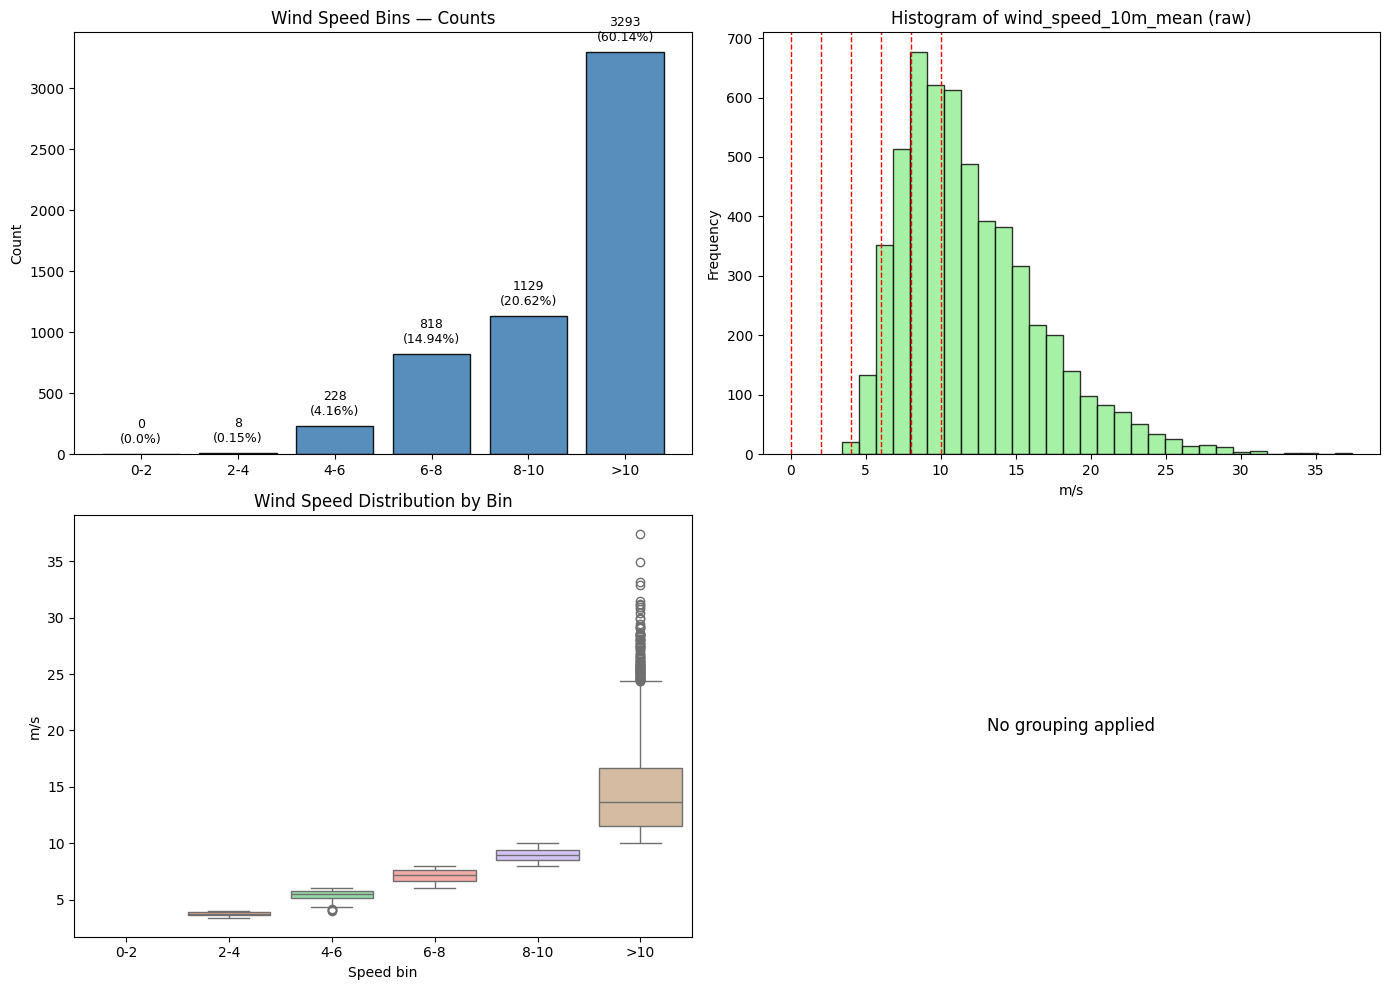

done


In [42]:
def visualize_wind_speed_bins(df, speed_bins=None, speed_labels=None, show=True):
    """
    Nicely formatted 2x2 visualization for wind_speed_10m_mean:
      - top-left: counts per bin (bar)
      - top-right: raw histogram with bin edges
      - bottom-left: boxplot of speeds by bin
      - bottom-right: placeholder (no grouping by precipitation_sum_next_4_days).
    Returns matplotlib Figure.
    """

    # defaults
    if speed_bins is None:
        speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    if speed_labels is None:
        speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']

    # validations
    if 'wind_speed_10m_mean' not in df.columns:
        raise KeyError("DataFrame must contain 'wind_speed_10m_mean'")

    # create binned column if missing
    if 'wind_speed_bin' not in df.columns:
        df['wind_speed_bin'] = pd.cut(
            df['wind_speed_10m_mean'],
            bins=speed_bins,
            labels=speed_labels,
            right=False,
            include_lowest=True
        )

    # counts & percentages (ordered)
    speed_counts = df['wind_speed_bin'].value_counts().reindex(speed_labels).fillna(0).astype(int)
    speed_pct = (speed_counts / speed_counts.sum() * 100).round(2)

    # figure layout
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    ax = axs[0, 0]
    bars = ax.bar(speed_labels, speed_counts.values, color='steelblue', edgecolor='k', alpha=0.9)
    ax.set_title('Wind Speed Bins — Counts')
    ax.set_ylabel('Count')
    for bar, cnt, pct in zip(bars, speed_counts.values, speed_pct.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            cnt + max(1, speed_counts.max() * 0.02),
            f"{cnt}\n({pct}%)",
            ha='center',
            va='bottom',
            fontsize=9
        )

    ax = axs[0, 1]
    clean_speed = df['wind_speed_10m_mean'].dropna()
    ax.hist(clean_speed, bins=30, color='lightgreen', edgecolor='k', alpha=0.8)
    # draw bin edges (skip +inf)
    for edge in speed_bins[:-1]:
        if np.isfinite(edge):
            ax.axvline(edge, color='red', linestyle='--', linewidth=1)
    ax.set_title('Histogram of wind_speed_10m_mean (raw)')
    ax.set_xlabel('m/s')
    ax.set_ylabel('Frequency')

    ax = axs[1, 0]
    sns.boxplot(
        x='wind_speed_bin',
        y='wind_speed_10m_mean',
        data=df,
        order=speed_labels,
        palette='pastel',
        ax=ax
    )
    ax.set_title('Wind Speed Distribution by Bin')
    ax.set_xlabel('Speed bin')
    ax.set_ylabel('m/s')

    ax = axs[1, 1]
    ax.text(0.5, 0.5, 'No grouping applied', ha='center', va='center', fontsize=12)
    ax.set_axis_off()

    plt.tight_layout()
    if show:
        plt.show()
    return fig

# Call the function without grouping
visualize_wind_speed_bins(df)
print('done')

Wind Speed Distribution: Majority (>60%) of wind speeds are above 10 m/s.
Skewness: Data is right-skewed with a long tail of higher values.
Bin Imbalance: Lower bins (e.g., 0–2 m/s) are underrepresented.
Boxplot: Higher wind speeds show greater variability.

In [43]:
# <Student to fill this section>
feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Summary
Feature Type: Continuous numeric variable representing average wind speed at 10 meters.
Distribution: Right-skewed, with 60.12% of values exceeding 10 m/s.
Rain Association: Higher wind speeds (>10 m/s) show correlation with rain events.
Distribution
Histogram: The feature exhibits a long tail, with most values concentrated between 8–12 m/s. Extreme values extend up to ~35 m/s.
Bin Counts: Lower bins (e.g., 0–2 m/s) are underrepresented, while the majority of observations fall in the >10 m/s bin (60.14%).
Boxplot: Higher wind speeds show greater variability, with significant outliers in the >10 m/s bin.
Limitations
Skewness: The strong right-skewness may bias models, requiring transformations (e.g., log1p) to stabilize variance and improve predictions.
Outliers: Extreme values may distort model training and evaluation. These outliers should be capped or removed during preprocessing.
Bin Imbalance: Lower bins are underrepresented, which may lead to biased predictions for low wind speeds.
Issues
Data Representation: The imbalance in bin counts could affect model performance, especially for predicting rare events associated with low wind speeds.
Interpretability: While the feature retains valuable information, its skewness and variability may complicate direct interpretation without preprocessing.

"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `apparent_temperature_mean`


In [45]:
# <Student to fill this section>
df.apparent_temperature_mean.head()


0    25.151611
1    26.942467
2    19.709002
3    21.016272
4    24.393919
Name: apparent_temperature_mean, dtype: float64

In [46]:
df.apparent_temperature_mean.describe()

count    5476.000000
mean       16.852724
std         5.831461
min         3.497893
25%        12.020747
50%        16.774519
75%        21.560749
max        32.557170
Name: apparent_temperature_mean, dtype: float64

In [47]:
df.apparent_temperature_mean.isnull().sum()

np.int64(0)

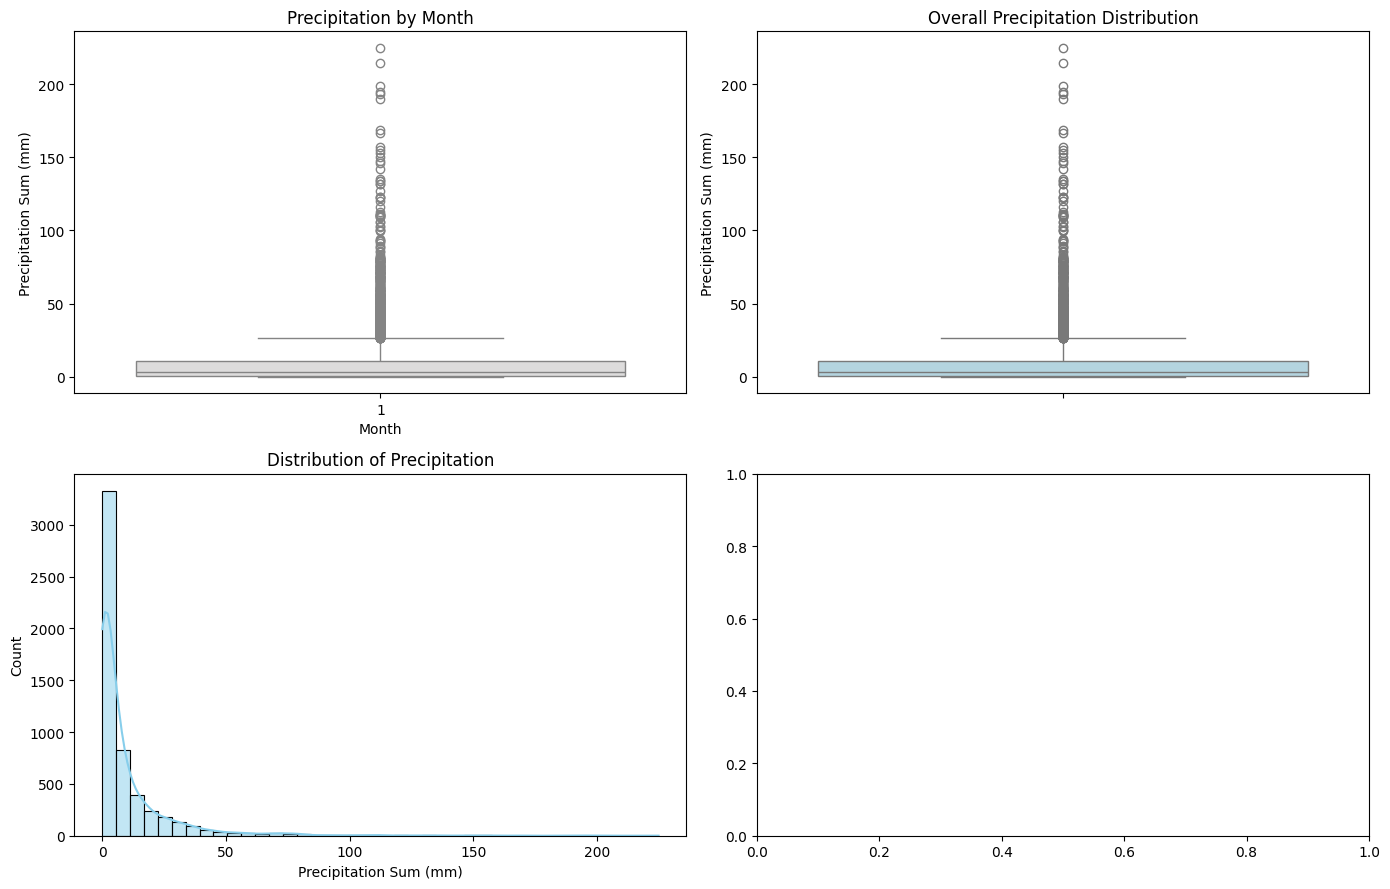

In [48]:
# Visualize precipitation_sum_next_4_days (4-panel)
if 'precipitation_sum_next_4_days' not in df.columns:
    raise KeyError("Column 'precipitation_sum_next_4_days' not found in df")

# ensure month/hour exist (create from 'time' if needed)
if 'month' not in df.columns or 'hour' not in df.columns:
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
        df['month'] = df['time'].dt.month
        df['hour'] = df['time'].dt.hour
    else:
        try:
            idx = pd.to_datetime(df.index)
            df['month'] = idx.month
            df['hour'] = idx.hour
        except Exception:
            df['month'] = np.nan
            df['hour'] = np.nan

fig, axs = plt.subplots(2, 2, figsize=(14, 9))

# 1) Boxplot by month
ax = axs[0, 0]
sns.boxplot(data=df, x='month', y='precipitation_sum_next_4_days', ax=ax, palette='coolwarm')
ax.set_title('Precipitation by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation Sum (mm)')

# 2) Boxplot of precipitation_sum_next_4_days (overall distribution)
ax = axs[0, 1]
sns.boxplot(y=df['precipitation_sum_next_4_days'], ax=ax, color='lightblue')
ax.set_title('Overall Precipitation Distribution')
ax.set_xlabel('')
ax.set_ylabel('Precipitation Sum (mm)')

# 3) Histogram + KDE
ax = axs[1, 0]
vals = df['precipitation_sum_next_4_days'].dropna()
sns.histplot(vals, bins=40, kde=True, color='skyblue', ax=ax)
ax.set_title('Distribution of Precipitation')
ax.set_xlabel('Precipitation Sum (mm)')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [49]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
Summary
Feature Type: Continuous numeric variable (mm) over the next 4 days.
Distribution: Highly right-skewed; most values near zero, with a long tail for heavy rainfall.
Distribution
Boxplot: Median precipitation is near zero; outliers exceed 200 mm.
Histogram: Majority of values clustered near zero; rare heavy rainfall events dominate the tail.
Limitations
Skewness: Requires transformation (e.g., log1p) for stable modeling.
Outliers: Extreme values may distort predictions; preprocessing needed.
Imbalance: Rare heavy rainfall events may bias model performance.
Issues
Representation: Imbalance between low and high precipitation values.
Seasonality: Potential monthly trends require further analysis.
Recommendations
Apply transformations to address skewness.
Handle outliers via capping or removal.
Investigate seasonal patterns for feature engineering.
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "Removing the data leakage columns"


In [51]:
temp=df.copy()

In [52]:
cols_to_drop=['weather_code','snowfall_sum','snowfall_water_equivalent_sum','precipitation_sum','precipitation_hours','rain_sum']


In [53]:


# Define a custom transformer to drop columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Specify the columns to drop
cols_to_drop = ['weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
                'precipitation_sum', 'precipitation_hours', 'rain_sum']

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_columns', DropColumnsTransformer(columns_to_drop=cols_to_drop))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250           25.670502   
1  2010-01-01 14:00:00+00:00            23.612165           26.920502   
2  2010-01-02 14:00:00+00:00            19.882996           20.620499   
3  2010-01-03 14:00:00+00:00            20.887167           22.520500   
4  2010-01-04 14:00:00+00:00            22.520498           26.020500   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_spee

In [54]:
# should be True if identical

In [55]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results


Reasons for dropping columns to avoid data leakage:
- weather_code: Encodes observed weather (includes precipitation) and can act as a direct surrogate for the target.
- snowfall_sum: Direct measurement of precipitation (snow) — leaks precipitation information.
- snowfall_water_equivalent_sum: Another direct precipitation metric — leaks target signal.
- precipitation_sum: Aggregate precipitation amount — direct leakage of precipitation magnitude.
- precipitation_hours: Indicates duration/occurrence of precipitation — leaks timing of precipitation events.
- rain_sum: Exact rainfall amount used to derive the binary target — direct target leakage.
"""


In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Correlation"


In [57]:
# <Student to fill this section>


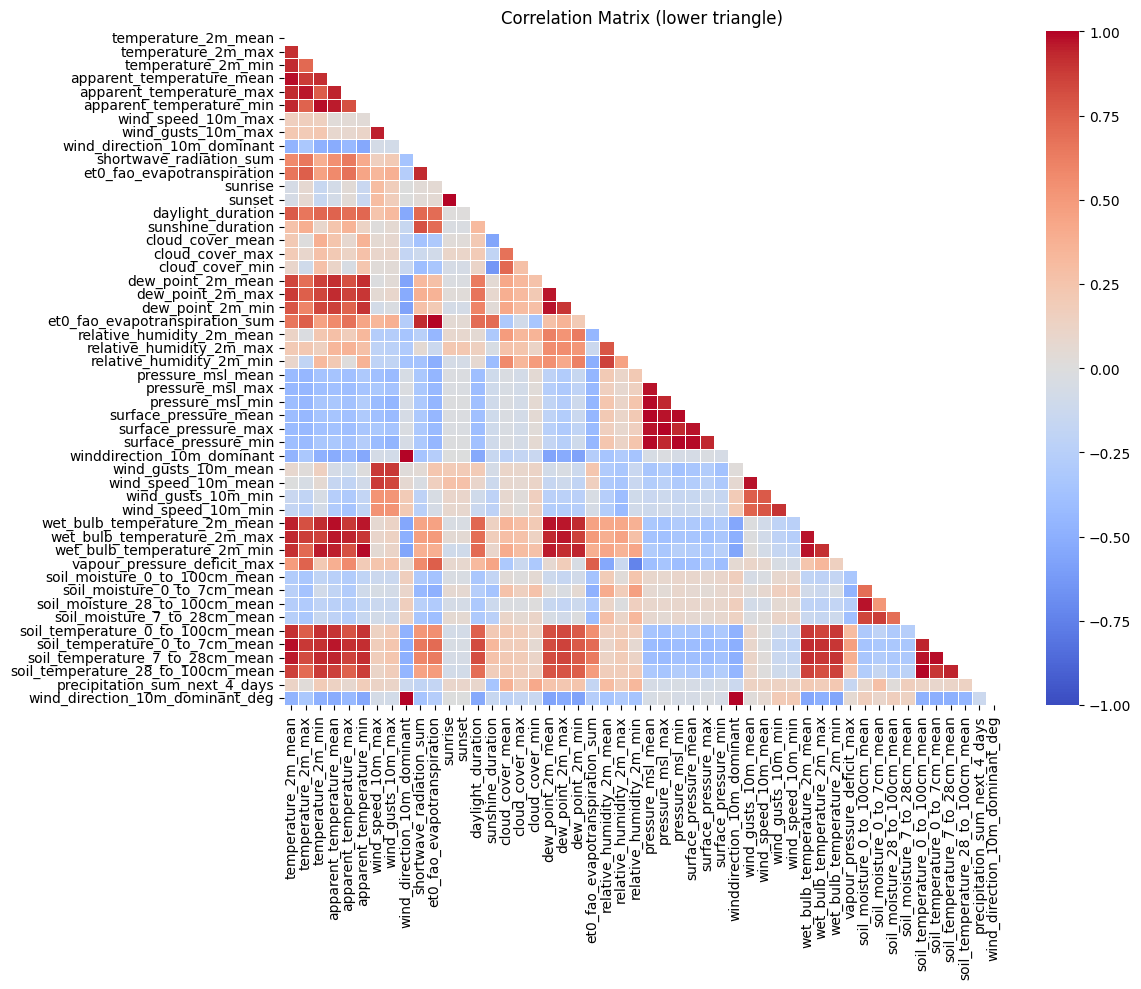

In [58]:

# <Student to fill this section>
# Compute correlations with target



# select numeric features (including the target)
num = df.select_dtypes(include=[np.number]).copy()

# drop columns with all-NaN or constant values to avoid useless correlations
num = num.loc[:, num.isna().mean() < 1.0]  # keep columns not completely null
num = num.loc[:, num.nunique(dropna=True) > 1]  # drop constant columns

# correlation matrix
corr = num.corr()

# 2) Full correlation matrix heatmap (masked upper triangle)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (lower triangle)')
plt.tight_layout()
plt.show()


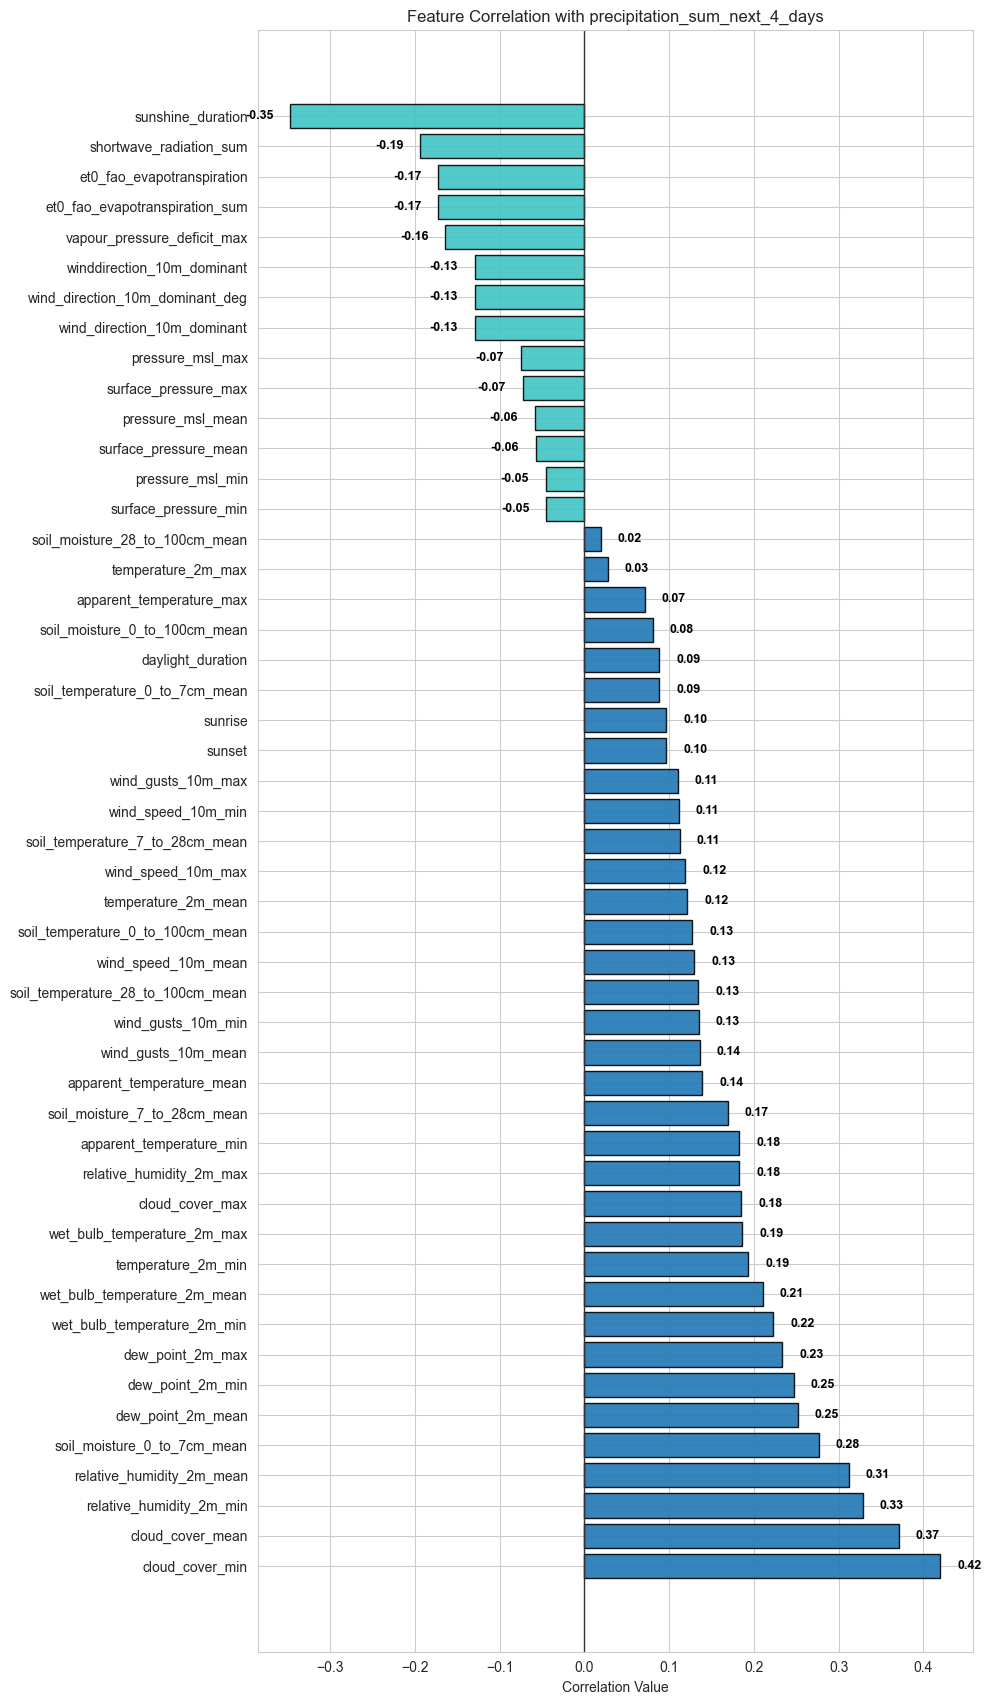

In [59]:
# compute correlations
corr = num.corr()
corr_with_target = corr['precipitation_sum_next_4_days'].drop('precipitation_sum_next_4_days').sort_values()  # ascending
# use seaborn style safely — some environments don't expose matplotlib 'seaborn-*' styles
try:
    plt.style.use('seaborn-whitegrid')
except Exception:
    try:
        sns.set_style('whitegrid')      # fallback to seaborn API
    except Exception:
        plt.style.use('default')       # final fallback

fig, ax = plt.subplots(figsize=(10, max(6, len(corr_with_target)*0.35)))

y = np.arange(len(corr_with_target))
vals = corr_with_target.values
labels = corr_with_target.index.tolist()

# colors: teal for negative, blue for positive (match example)
colors = ['#40c4c4' if v < 0 else '#1f77b4' for v in vals]

ax.barh(y, vals, color=colors, edgecolor='k', alpha=0.9)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()
ax.axvline(0, color='0.2', linewidth=1)

# annotate values on bars (keep annotations inside figure bounds)
xpad = 0.02
for i, v in enumerate(vals):
    if v < 0:
        ha = 'right'
        xpos = v - xpad
    else:
        ha = 'left'
        xpos = v + xpad
    # clamp xpos to axis limits to avoid text disappearing
    xmin, xmax = ax.get_xlim()
    xpos = max(min(xpos, xmax - 0.01), xmin + 0.01)
    ax.text(xpos, i, f"{v:.2f}", va='center', ha=ha, fontsize=9, color='black', weight='bold')

ax.set_xlabel('Correlation Value')
ax.set_title('Feature Correlation with precipitation_sum_next_4_days')
plt.tight_layout()
plt.show()


In [60]:
# First, identify low-correlation features and store them in a list
def identify_low_correlation_features(df, target_column, threshold=(-0.1, 0.1)):
    """
    Identify features with low correlation to the target variable.
    Returns a list of column names to drop.
    """
    # Select numeric columns
    num = df.select_dtypes(include=[np.number]).copy()
    num = num.loc[:, num.nunique(dropna=True) > 1]  # Drop constant columns
    
    # Compute correlation with the target
    corr_with_target = num.corr().get(target_column)
    if corr_with_target is None:
        raise KeyError(f"Target '{target_column}' not found in numeric columns for correlation")
    
    # Identify low-correlation features
    low_corr_mask = corr_with_target.between(threshold[0], threshold[1])
    low_corr_features = corr_with_target[low_corr_mask].drop(target_column, errors='ignore').index.tolist()
    
    return low_corr_features

# Identify low-correlation features
low_correlation_columns = identify_low_correlation_features(
    df, 
    target_column='precipitation_sum_next_4_days', 
    threshold=(-0.1, 0.1)
)

print(f"Low-correlation features to drop: {low_correlation_columns}")
print(f"Number of features to drop: {len(low_correlation_columns)}")


Low-correlation features to drop: ['temperature_2m_max', 'apparent_temperature_max', 'sunrise', 'sunset', 'daylight_duration', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_28_to_100cm_mean', 'soil_temperature_0_to_7cm_mean']
Number of features to drop: 14


In [61]:

# Define a simplified transformer that uses the pre-identified list
class DropSpecificColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Drop the specified columns
        return X.drop(columns=self.columns_to_drop, errors='ignore')

low_correlation_columns= ['temperature_2m_max', 'apparent_temperature_max', 'sunrise', 'sunset', 'daylight_duration', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'wind_gusts_10m_min', 'wind_speed_10m_min', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_28_to_100cm_mean', 'soil_temperature_0_to_7cm_mean', 'radiation_per_sunhour']

# Create the pipeline using the pre-identified list
low_corr_pipeline = Pipeline(steps=[
    ('drop_low_corr', DropSpecificColumns(columns_to_drop=low_correlation_columns))
])

# Apply the pipeline to the dataframe
try:
    df = low_corr_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
    print(f"DataFrame shape after dropping low-correlation features: {df.shape}")
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00            22.964250           21.070500   
1  2010-01-01 14:00:00+00:00            23.612165           20.970500   
2  2010-01-02 14:00:00+00:00            19.882996           19.470500   
3  2010-01-03 14:00:00+00:00            20.887167           19.220500   
4  2010-01-04 14:00:00+00:00            22.520498           18.620499   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                  25.151611                 24.240880           18.581022   
1                  26.942467                 22.179842           15.584300   
2                  19.709002                 19.180962           18.345877   
3                  21.016272                 19.466248           16.870138   
4                  24.393919                 19.811030           17.477621   

   wind_gusts_10m_max  wind_direction_

In [62]:
# <Student to fill this section>
feature_selection_2_insights = """
provide an explanation on why you use this approach for feature selection and describe its results

Removed numeric features whose Pearson correlation with the target (precipitation_sum_next_4_days) is weak (|corr| <= 0.1).
Rationale: a simple, fast filter to remove largely uninformative features, reduce noise and model complexity, and speed up training.
Caveat: this only captures linear relationships — non-linear predictors should be tested separately.
Result: low‑correlation numeric columns were dropped; remaining features have stronger linear association with the target.


"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [64]:

# Define a custom transformer to drop specific columns
class DropSpecificColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Specify the columns to drop
columns_to_drop = ['month', 'hour']

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_specific_columns', DropSpecificColumns(columns_to_drop=columns_to_drop))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    features_list = df.columns.drop('precipitation_sum_next_4_days').tolist()  # Update the feature list
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.info())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476 entries, 0 to 5475
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   date                               5476 non-null   object  
 1   temperature_2m_mean                5476 non-null   float64 
 2   temperature_2m_min                 5476 non-null   float64 
 3   apparent_temperature_mean          5476 non-null   float64 
 4   apparent_temperature_min           5476 non-null   float64 
 5   wind_speed_10m_max                 5476 non-null   float64 
 6   wind_gusts_10m_max                 5476 non-null   float64 
 7   wind_direction_10m_dominant        5476 non-null   float64 
 8   shortwave_radiation_sum            5476 non-null   float64 
 9   et0_fao_evapotranspiration         5476 non-null   float64 
 10  sunshine_duration                  5476 non-null   flo

In [27]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected

Selected features (target 'precipitation_sum_next_4_days' excluded).
Why: removed leakage columns and then filtered numeric features with weak Pearson correlation (|corr| <= 0.1) to reduce noise and model complexity.
Result: remaining features are those with clearer linear signal to the target; sample:

"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Cleaning `Outliers`

In [67]:
# <Student to fill this section>

In [68]:

def detect_outliers_iqr(df, cols=None, k=1.5):
    """
    Returns a boolean DataFrame (same index/cols) where True indicates an outlier per IQR rule:
    value < Q1 - k*IQR or value > Q3 + k*IQR
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c].dropna()
        if series.empty:
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        out.loc[:, c] = (df[c] < lower) | (df[c] > upper)
    return out

def detect_outliers_zscore(df, cols=None, thresh=3.0):
    """
    Returns a boolean DataFrame where True indicates |(x - mean)/std| > thresh.
    Uses population std (ddof=0) to be conservative; ignores NaNs.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c]
        if series.dropna().shape[0] < 2:
            continue
        mu = series.mean()
        sigma = series.std(ddof=0)
        if sigma == 0 or np.isnan(sigma):
            continue
        z = (series - mu) / sigma
        out[c] = z.abs() > thresh
    return out

# Example usage: compute and summarize outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('precipitation_sum_next_4_days', errors='ignore').tolist()

iqr_out = detect_outliers_iqr(df, cols=numeric_cols, k=1.5)
z_out = detect_outliers_zscore(df, cols=numeric_cols, thresh=3.0)
raw_iqr_out=iqr_out
raw_z_out=z_out

# combine (True if flagged by either method)
outlier_flags = iqr_out | z_out

# summary counts per column and percent
outlier_counts = outlier_flags.sum().sort_values(ascending=False)
outlier_pct = (outlier_counts / len(df) * 100).round(3)
out_summary = pd.DataFrame({'count': outlier_counts, 'pct': outlier_pct})
display(out_summary[out_summary['count'] > 0])

# rows that have any outlier
rows_with_outliers = outlier_flags.any(axis=1)
print(f"Rows with any outlier: {rows_with_outliers.sum()} / {len(df)} ({rows_with_outliers.mean()*100:.2f}%)")

# show a few example rows with outliers and which cols are flagged
if rows_with_outliers.any():
    sample_idx = df.index[rows_with_outliers][:10]
    display(pd.concat([df.loc[sample_idx, numeric_cols], outlier_flags.loc[sample_idx, numeric_cols].astype(int)],
                      keys=['values','outlier_flag'], axis=1))


,count,pct
cloud_cover_max,863,15.760
cloud_cover_min,626,11.432
sunshine_duration,486,8.875
vapour_pressure_deficit_max,312,5.698
relative_humidity_2m_max,203,3.707
wind_speed_10m_mean,126,2.301
wind_gusts_10m_mean,108,1.972
wind_gusts_10m_max,97,1.771
relative_humidity_2m_mean,81,1.479
wind_speed_10m_max,76,1.388


Rows with any outlier: 2064 / 5476 (37.69%)


values                                               \
   temperature_2m_mean temperature_2m_min apparent_temperature_mean   
0            22.964250          21.070500                 25.151611   
2            19.882996          19.470500                 19.709002   
6            21.364248          19.620499                 21.611094   
9            24.451752          21.270500                 26.600761   
11           25.524672          21.170502                 28.837305   
13           21.370500          19.920502                 21.535097   
14           22.070498          21.120499                 23.728148   
18           20.176750          15.970500                 19.526289   
19           22.966330          17.320500                 23.623262   
20           24.076752          20.220500                 27.146093   

                                                                   \
   apparent_temperature_min wind_speed_10m_max wind_gusts_10m_max   
0                 24.240880          18.581022          35.640000   
2                 19.180962          18.345877          37.440000   
6                 20.034603          14.904173          32.760002   
9                 23.076862          18.720001          41.399998   
11                23.731840          18.864824          38.519997   
13                19.490849          19.211996          38.519997   
14                22.689213          14.408997          32.039997   
18                14.406509          11.019764          24.840000   
19                17.775885          10.538843          30.239998   
20                22.356720          16.454008          39.239998   

                                                        \
   wind_direction_10m_dominant shortwave_radiation_sum   
0                   331.647500                   10.13   
2                   146.744640                    6.71   
6                   147.255040                   15.25   
9                   159.518510                   30.68   
11                   37.020980                   29.77   
13                  165.633290                   10.39   
14                  138.623700                    9.22   
18                  262.253700                   32.49   
19                  342.928900                   31.87   
20                  116.392395                   31.04   

                                                 ...  \
   et0_fao_evapotranspiration sunshine_duration  ...   
0                    2.459723         11820.637  ...   
2                    2.140701             0.000  ...   
6                    3.494862         32123.543  ...   
9                    5.892919         48093.242  ...   
11                   6.043021         47979.957  ...   
13                   2.783151          8371.987  ...   
14                   2.209497          9170.603  ...   
18                   6.096776         47507.840  ...   
19                   6.385178         47432.164  ...   
20                   6.052560         47354.742  ...   

                   outlier_flag                              \
   wet_bulb_temperature_2m_mean wet_bulb_temperature_2m_max   
0                             0                           0   
2                             0                           0   
6                             0                           0   
9                             0                           0   
11                            0                           0   
13                            0                           0   
14                            0                           0   
18                            0                           0   
19                            0                           0   
20                            0                           0   

                                                            \
   wet_bulb_temperature_2m_min vapour_pressure_deficit_max   
0                            0                           0   
2                    

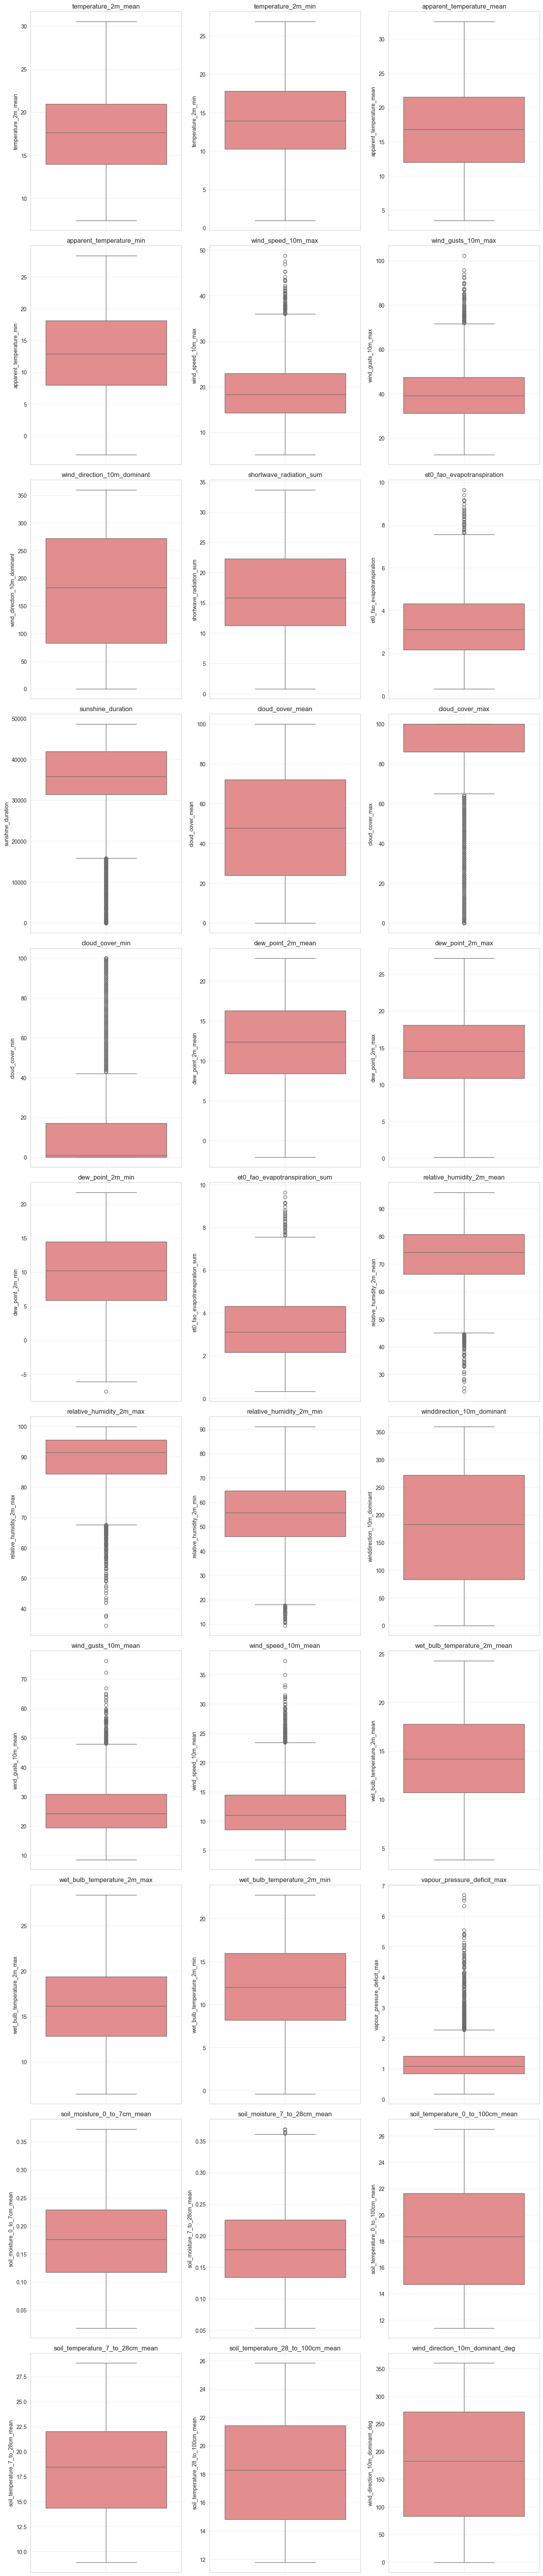

done


In [69]:

def plot_boxplots(df, cols=None, by=None, per_row=3, figsize=(14, 6)):
    """
    Plot boxplots for numeric columns.
    - cols: list of columns to plot (defaults to numeric columns excluding target)
    - by: if provided (e.g. 'precipitation_sum_next_4_days') will draw grouped boxplots per column
    - per_row: number of subplots per row
    """

    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
        # exclude obvious non-feature numeric cols
        for excl in ('precipitation_sum_next_4_days',):
            if excl in cols:
                cols.remove(excl)

    n = len(cols)
    if n == 0:
        print("No numeric columns to plot.")
        return

    rows = math.ceil(n / per_row)
    fig, axes = plt.subplots(rows, per_row, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]
        if by is not None and by in df.columns:
            sns.boxplot(x=by, y=col, data=df, ax=ax, palette=['#2ca02c','#1f77b4'])
            ax.set_xlabel(str(by))
        else:
            sns.boxplot(y=df[col].dropna(), ax=ax, color='lightcoral')
            ax.set_xlabel('')
        ax.set_title(col)
        ax.grid(alpha=0.3)

    # hide any unused axes
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    return fig

# Example usage:
# 1) Boxplots for default numeric features
plot_boxplots(df)
print('done')




Removing the outliers using the upper bound and lower bound with k=1.5

In [70]:
temp=df.copy()# for comparision

In [71]:
# First, create a function to calculate outlier bounds for each column
def calculate_outlier_bounds(df, target_column='precipitation_sum_next_4_days', k=1.5):
    """
    Calculate upper and lower bounds for outlier capping for each numeric column.
    Returns a dictionary with bounds for each column.
    """
    # Select numeric columns excluding the target column
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)
    
    bounds_dict = {}
    for col in numeric_cols:
        ser = pd.to_numeric(df[col], errors='coerce')
        if ser.dropna().shape[0] < 1:
            continue
            
        q1 = ser.quantile(0.25)
        q3 = ser.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        
        # Ensure non-negative bounds
        lower_fill = float(max(lower, 0.0))
        upper_fill = float(max(upper, 0.0))
        
        bounds_dict[col] = {
            'lower_fill': lower_fill,
            'upper_fill': upper_fill
        }
    
    return bounds_dict

# Calculate the bounds dictionary
outlier_bounds = calculate_outlier_bounds(
    df, 
    target_column='precipitation_sum_next_4_days', 
    k=1.5
)

print("Outlier bounds calculated for columns:")
for col, bounds in outlier_bounds.items():
    print(f"{col}: lower={bounds['lower_fill']:.3f}, upper={bounds['upper_fill']:.3f}")
print(f"\nTotal columns with bounds: {len(outlier_bounds)}")
outlier_bounds

Outlier bounds calculated for columns:
temperature_2m_mean: lower=3.493, upper=31.417
temperature_2m_min: lower=0.000, upper=29.145
apparent_temperature_mean: lower=0.000, upper=35.871
apparent_temperature_min: lower=0.000, upper=33.345
wind_speed_10m_max: lower=1.234, upper=35.949
wind_gusts_10m_max: lower=7.020, upper=71.820
wind_direction_10m_dominant: lower=0.000, upper=555.599
shortwave_radiation_sum: lower=0.000, upper=38.786
et0_fao_evapotranspiration: lower=0.000, upper=7.562
sunshine_duration: lower=15814.849, upper=57505.312
cloud_cover_mean: lower=0.000, upper=144.354
cloud_cover_max: lower=65.000, upper=121.000
cloud_cover_min: lower=0.000, upper=42.500
dew_point_2m_mean: lower=0.000, upper=28.120
dew_point_2m_max: lower=0.045, upper=28.913
dew_point_2m_min: lower=0.000, upper=27.469
et0_fao_evapotranspiration_sum: lower=0.000, upper=7.562
relative_humidity_2m_mean: lower=44.673, upper=102.398
relative_humidity_2m_max: lower=67.602, upper=112.350
relative_humidity_2m_min: l

{'temperature_2m_mean': {'lower_fill': 3.492660374999998,
  'upper_fill': 31.416903375000004},
 'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 29.1455},
 'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 35.870753},
 'apparent_temperature_min': {'lower_fill': 0.0,
  'upper_fill': 33.34513911249999},
 'wind_speed_10m_max': {'lower_fill': 1.233520875, 'upper_fill': 35.949095875},
 'wind_gusts_10m_max': {'lower_fill': 7.019999500000001,
  'upper_fill': 71.81999549999999},
 'wind_direction_10m_dominant': {'lower_fill': 0.0,
  'upper_fill': 555.599491875},
 'shortwave_radiation_sum': {'lower_fill': 0.0,
  'upper_fill': 38.786249999999995},
 'et0_fao_evapotranspiration': {'lower_fill': 0.0,
  'upper_fill': 7.561602725000002},
 'sunshine_duration': {'lower_fill': 15814.848625000006,
  'upper_fill': 57505.311624999995},
 'cloud_cover_mean': {'lower_fill': 0.0, 'upper_fill': 144.35416475},
 'cloud_cover_max': {'lower_fill': 65.0, 'upper_fill': 121.0},
 'cloud_cover_min': {

In [72]:

# Modified transformer that uses the pre-calculated bounds dictionary
class CapOutliersFromDict(BaseEstimator, TransformerMixin):
    def __init__(self, bounds_dict):
        self.bounds_dict = bounds_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, bounds in self.bounds_dict.items():
            if col not in X.columns:
                continue
                
            lower_fill = bounds['lower_fill']
            upper_fill = bounds['upper_fill']

            X[col] = pd.to_numeric(X[col], errors='coerce')
            X.loc[X[col] < lower_fill, col] = lower_fill
            X.loc[X[col] > upper_fill, col] = upper_fill
        return X
outlier_bounds={'temperature_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.0390099263708124},
 'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.0870135293646832},
 'apparent_temperature_mean': {'lower_fill': 0.0,
  'upper_fill': 1.1140284047672626},
 'apparent_temperature_min': {'lower_fill': 0.0,
  'upper_fill': 1.1768906411625464},
 'wind_speed_10m_max': {'lower_fill': 0.132333338294502,
  'upper_fill': 1.134174161783695},
 'wind_gusts_10m_max': {'lower_fill': 0.0, 'upper_fill': 1.0000000000000002},
 'wind_direction_10m_dominant': {'lower_fill': 0.0,
  'upper_fill': 1.5440955916309815},
 'shortwave_radiation_sum': {'lower_fill': 0.0,
  'upper_fill': 1.1560502283105025},
 'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 1.0},
 'sunshine_duration': {'lower_fill': 0.0, 'upper_fill': 1.270743538679772},
 'cloud_cover_mean': {'lower_fill': 0.0, 'upper_fill': 1.4435416475},
 'cloud_cover_max': {'lower_fill': 0.0, 'upper_fill': 1.6000000000000008},
 'cloud_cover_min': {'lower_fill': 0.0, 'upper_fill': 1.9152894957584379},
 'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.2299532485531657},
 'dew_point_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.063789279112754},
 'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.2636629097182288},
 'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 1.0},
 'relative_humidity_2m_mean': {'lower_fill': 3.3306690738754696e-16,
  'upper_fill': 1.1252190464170844},
 'relative_humidity_2m_max': {'lower_fill': 0.0,
  'upper_fill': 1.3812069872838006},
 'relative_humidity_2m_min': {'lower_fill': 5.551115123125783e-17,
  'upper_fill': 1.0244844611079011},
 'winddirection_10m_dominant': {'lower_fill': 0.0,
  'upper_fill': 1.5440955916309815},
 'wind_gusts_10m_mean': {'lower_fill': 0.053925895421582604,
  'upper_fill': 1.1449946270239484},
 'wind_speed_10m_mean': {'lower_fill': 0.025425608029460978,
  'upper_fill': 1.1589530170126627},
 'wet_bulb_temperature_2m_mean': {'lower_fill': 0.0,
  'upper_fill': 1.1959062328556291},
 'wet_bulb_temperature_2m_max': {'lower_fill': 0.0,
  'upper_fill': 1.0348707172569274},
 'wet_bulb_temperature_2m_min': {'lower_fill': 0.0,
  'upper_fill': 1.2145030202088112},
 'vapour_pressure_deficit_max': {'lower_fill': 0.03462137583318187,
  'upper_fill': 1.1007901896473604},
 'soil_moisture_0_to_7cm_mean': {'lower_fill': 0.0,
  'upper_fill': 1.0682138384790962},
 'soil_moisture_7_to_28cm_mean': {'lower_fill': 0.0,
  'upper_fill': 1.0000000000000002},
 'soil_temperature_0_to_100cm_mean': {'lower_fill': 0.0,
  'upper_fill': 1.365240861524692},
 'soil_temperature_7_to_28cm_mean': {'lower_fill': 0.0,
  'upper_fill': 1.2335928570691173},
 'soil_temperature_28_to_100cm_mean': {'lower_fill': 0.0,
  'upper_fill': 1.3914280692058174},
 'wind_direction_10m_dominant_deg': {'lower_fill': 0.0,
  'upper_fill': 1.5440955916309815},
 'temp_humidity_interaction': {'lower_fill': 0.0,
  'upper_fill': 1.1503004218330197},
 'cloud_sun_interaction': {'lower_fill': 0.0,
  'upper_fill': 0.9289343783125318}}
# Create the pipeline using the pre-calculated bounds dictionary
cap_outliers_pipeline = Pipeline(steps=[
    ('cap_outliers', CapOutliersFromDict(bounds_dict=outlier_bounds))
])

# Apply the pipeline to the dataframe
try:
    df = cap_outliers_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00              1.03901            1.087014   
1  2010-01-01 14:00:00+00:00              1.03901            1.087014   
2  2010-01-02 14:00:00+00:00              1.03901            1.087014   
3  2010-01-03 14:00:00+00:00              1.03901            1.087014   
4  2010-01-04 14:00:00+00:00              1.03901            1.087014   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                   1.114028                  1.176891            1.134174   
1                   1.114028                  1.176891            1.134174   
2                   1.114028                  1.176891            1.134174   
3                   1.114028                  1.176891            1.134174   
4                   1.114028                  1.176891            1.134174   

   wind_gusts_10m_max  wind_direction_

In [73]:
# Define a function to count outliers in a DataFrame
def count_outliers(temp, cols=None, k=1.5):
    """
    Count the number of outliers in each column based on the IQR method.
    - temp: DataFrame to analyze
    - cols: list of numeric columns (defaults to all numeric except 'precipitation_sum_next_4_days')
    - k: multiplier for IQR (default 1.5)
    Returns a DataFrame summarizing outlier counts per column.
    """
    if cols is None:
        cols = temp.select_dtypes(include=[np.number]).columns.tolist()
        if 'precipitation_sum_next_4_days' in cols:
            cols.remove('precipitation_sum_next_4_days')

    stats = []
    for c in cols:
        ser = pd.to_numeric(temp[c], errors='coerce')
        if ser.dropna().shape[0] < 1:
            stats.append({'column': c, 'outliers': 0, 'pct_outliers': 0.0})
            continue

        q1 = ser.quantile(0.25)
        q3 = ser.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr

        mask = (ser < lower) | (ser > upper)
        n_outliers = int(mask.sum())
        pct_outliers = n_outliers / len(temp) * 100 if len(temp) > 0 else 0.0

        stats.append({'column': c, 'outliers': n_outliers, 'pct_outliers': round(pct_outliers, 4)})

    return pd.DataFrame(stats).set_index('column')

# Check for outliers before transformation
outliers_before = count_outliers(temp, cols=numeric_cols, k=1.5)


# Check for outliers after transformation
outliers_after = count_outliers(df, cols=numeric_cols, k=1.5)


# Compare the results
comparison = outliers_before.join(outliers_after, lsuffix='_before', rsuffix='_after')
comparison['outliers_removed'] = comparison['outliers_before'] - comparison['outliers_after']
print("Comparison of outliers before and after transformation:")
display(comparison.sort_values('outliers_removed', ascending=False))

Comparison of outliers before and after transformation:


,outliers_before,pct_outliers_before,outliers_after,pct_outliers_after,outliers_removed
column,,,,,
cloud_cover_max,863,15.7597,93,1.6983,770
cloud_cover_min,626,11.4317,0,0.0000,626
sunshine_duration,486,8.8751,95,1.7348,391
relative_humidity_2m_max,203,3.7071,0,0.0000,203
vapour_pressure_deficit_max,312,5.6976,173,3.1592,139
wind_speed_10m_mean,126,2.3009,0,0.0000,126
wind_gusts_10m_mean,108,1.9722,0,0.0000,108
wind_gusts_10m_max,97,1.7714,0,0.0000,97
relative_humidity_2m_mean,81,1.4792,0,0.0000,81


In [74]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts

Fixing outliers is important because they can distort summary statistics (mean, std), bias model parameters, and degrade performance — especially for linear, distance‑based, and tree‑based methods when extreme values are present. Outliers often indicate sensor errors, data entry mistakes, or rare but valid events; investigating their source helps choose an appropriate treatment (remove, cap, transform, or keep with a flag).

Impacts of not addressing outliers:
- Inflated error metrics and unstable training.
- Poor generalization to typical data.
- Misleading feature importance and interpretability.

"""





In [75]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## F. Feature Engineering

### F.1 New Feature "humidity_dewpoint_interaction"


In [76]:
df.columns

Index(['date', 'temperature_2m_mean', 'temperature_2m_min',
       'apparent_temperature_mean', 'apparent_temperature_min',
       'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'sunshine_duration', 'cloud_cover_mean',
       'cloud_cover_max', 'cloud_cover_min', 'dew_point_2m_mean',
       'dew_point_2m_max', 'dew_point_2m_min',
       'et0_fao_evapotranspiration_sum', 'relative_humidity_2m_mean',
       'relative_humidity_2m_max', 'relative_humidity_2m_min',
       'winddirection_10m_dominant', 'wind_gusts_10m_mean',
       'wind_speed_10m_mean', 'wet_bulb_temperature_2m_mean',
       'wet_bulb_temperature_2m_max', 'wet_bulb_temperature_2m_min',
       'vapour_pressure_deficit_max', 'soil_moisture_0_to_7cm_mean',
       'soil_moisture_7_to_28cm_mean', 'soil_temperature_0_to_100cm_mean',
       'soil_temperature_7_to_28cm_mean', 'soil_temperature_28_to_100cm_mean',
       'precipitation_

In [77]:
# Define a custom transformer for humidity and dew point interaction
class HumidityDewPointInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, humidity_col='relative_humidity_2m_mean', dewpoint_col='dew_point_2m_mean', interaction_col='humidity_dewpoint_interaction'):
        self.humidity_col = humidity_col
        self.dewpoint_col = dewpoint_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.humidity_col not in X.columns or self.dewpoint_col not in X.columns:
            raise KeyError(f"Columns '{self.humidity_col}' and/or '{self.dewpoint_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.humidity_col] * X[self.dewpoint_col]
        return X

# Create the pipeline
humidity_dewpoint_pipeline = Pipeline(steps=[
    ('humidity_dewpoint_interaction', HumidityDewPointInteractionTransformer(
        humidity_col='relative_humidity_2m_mean',
        dewpoint_col='dew_point_2m_mean',
        interaction_col='humidity_dewpoint_interaction'
    ))
])
# hehehe
# Apply the pipeline to the dataframe
try:
    df = humidity_dewpoint_pipeline.fit_transform(df)  # Use the pipeline, not the class
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['relative_humidity_2m_mean', 'dew_point_2m_mean', 'humidity_dewpoint_interaction']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
   relative_humidity_2m_mean  dew_point_2m_mean  humidity_dewpoint_interaction
0                   1.125219           1.229953                       1.383967
1                   1.125219           1.229953                       1.383967
2                   1.125219           1.229953                       1.383967
3                   1.125219           1.229953                       1.383967
4                   1.125219           1.229953                       1.383967


In [78]:
features_list.append('humidity_dewpoint_interaction')

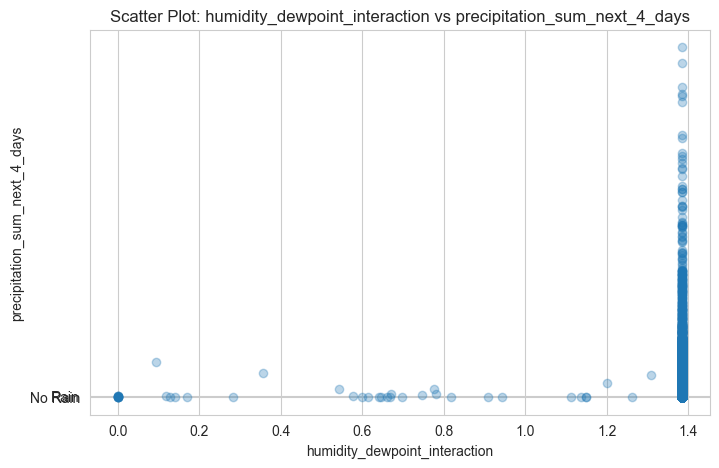

In [79]:
plt.figure(figsize=(8, 5))
plt.scatter(df['humidity_dewpoint_interaction'], df['precipitation_sum_next_4_days'], alpha=0.3)
plt.xlabel('humidity_dewpoint_interaction')
plt.ylabel('precipitation_sum_next_4_days')
plt.title('Scatter Plot: humidity_dewpoint_interaction vs precipitation_sum_next_4_days')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [80]:
# Compute correlation between humidity_dewpoint_interaction and the target variable
correlation = df['humidity_dewpoint_interaction'].corr(df['precipitation_sum_next_4_days'])
print(f"Correlation between humidity_dewpoint_interaction and precipitation_sum_next_4_days: {correlation:.4f}")

Correlation between humidity_dewpoint_interaction and precipitation_sum_next_4_days: 0.0345


In [81]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts

The interaction between relative humidity and dew point captures atmospheric moisture conditions that are critical for precipitation formation.
 When both humidity and dew point are high, the atmosphere is saturated and more likely to produce rainfall.

"""

In [82]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "cloud_sun_interaction"




In [83]:
# <Student to fill this section>

In [84]:


# Define a custom transformer to create the cloud_sun_interaction feature
class CloudSunInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cloud_col='cloud_cover_mean', sun_col='sunshine_duration', interaction_col='cloud_sun_interaction'):
        self.cloud_col = cloud_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.cloud_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.cloud_col}' and/or '{self.sun_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.cloud_col] * X[self.sun_col]
        return X

# Create the pipeline
cloud_sun_pipeline = Pipeline(steps=[
    ('cloud_sun_interaction', CloudSunInteractionTransformer(
        cloud_col='cloud_cover_mean',
        sun_col='sunshine_duration',
        interaction_col='cloud_sun_interaction'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = cloud_sun_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['cloud_cover_mean', 'sunshine_duration', 'cloud_sun_interaction']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df['cloud_sun_interaction'].head()

Pipeline applied successfully. Transformed DataFrame:
   cloud_cover_mean  sunshine_duration  cloud_sun_interaction
0          1.443542           1.270744               1.834371
1          1.443542           1.270744               1.834371
2          1.443542           0.000000               0.000000
3          1.443542           1.270744               1.834371
4          1.443542           1.270744               1.834371


0    1.834371
1    1.834371
2    0.000000
3    1.834371
4    1.834371
Name: cloud_sun_interaction, dtype: float64

In [85]:
features_list.append('cloud_sun_interaction')

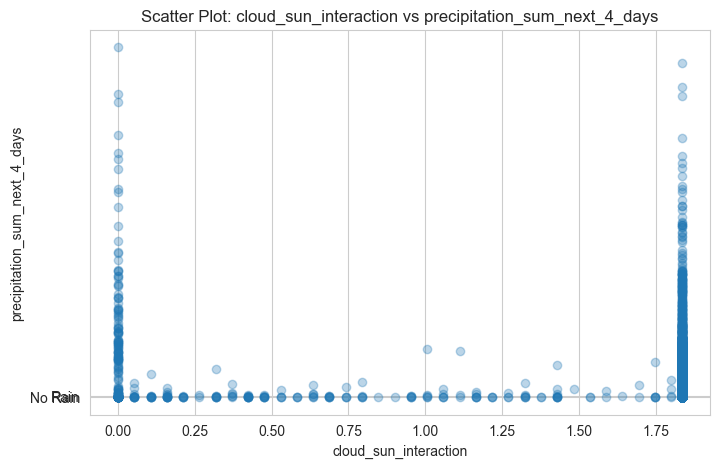

In [86]:
plt.figure(figsize=(8, 5))
plt.scatter(df['cloud_sun_interaction'], df['precipitation_sum_next_4_days'], alpha=0.3)
plt.xlabel('cloud_sun_interaction')
plt.ylabel('precipitation_sum_next_4_days')
plt.title('Scatter Plot: cloud_sun_interaction vs precipitation_sum_next_4_days')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [87]:
# Compute correlation between cloud_sun_interaction and the target variable
correlation = df['cloud_sun_interaction'].corr(df['precipitation_sum_next_4_days'])
print(f"Correlation between cloud_sun_interaction and precipitation_sum_next_4_days: {correlation:.4f}")

Correlation between cloud_sun_interaction and precipitation_sum_next_4_days: -0.1494


In [88]:
feature_engineering_2_explanations = """
Creating the cloud_sun_interaction feature is important because it captures the combined effect of cloud cover and sunshine duration,
which are both critical factors influencing surface weather conditions and rainfall. High cloud cover typically reduces sunshine, but their
interaction can reveal nuanced patterns (e.g., brief sunny intervals during mostly cloudy days) that may be predictive of rain events.
Including this interaction helps the model learn non-linear relationships, improves predictive accuracy, and leverages domain knowledge about atmospheric processes.
"""

In [89]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "radiation_per_sunhour"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [90]:
# <Student to fill this section>

In [91]:


# Define a custom transformer to create the radiation_per_sunhour feature
class RadiationPerSunhourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, radiation_col='shortwave_radiation_sum', sun_col='sunshine_duration', interaction_col='radiation_per_sunhour'):
        self.radiation_col = radiation_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.radiation_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.radiation_col}' and/or '{self.sun_col}' not found in input data.")

        # Avoid division by zero
        X[self.interaction_col] = X[self.radiation_col] / (X[self.sun_col].replace(0, 1e-6))
        return X

# Create the pipeline
radiation_pipeline = Pipeline(steps=[
    ('radiation_per_sunhour', RadiationPerSunhourTransformer(
        radiation_col='shortwave_radiation_sum',
        sun_col='sunshine_duration',
        interaction_col='radiation_per_sunhour'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = radiation_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['shortwave_radiation_sum', 'sunshine_duration', 'radiation_per_sunhour']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df['radiation_per_sunhour'].head()

Pipeline applied successfully. Transformed DataFrame:
   shortwave_radiation_sum  sunshine_duration  radiation_per_sunhour
0                  1.15605           1.270744           9.097431e-01
1                  1.15605           1.270744           9.097431e-01
2                  1.15605           0.000000           1.156050e+06
3                  1.15605           1.270744           9.097431e-01
4                  1.15605           1.270744           9.097431e-01


0    9.097431e-01
1    9.097431e-01
2    1.156050e+06
3    9.097431e-01
4    9.097431e-01
Name: radiation_per_sunhour, dtype: float64

In [92]:
features_list.append('shortwave_radiation_sum')

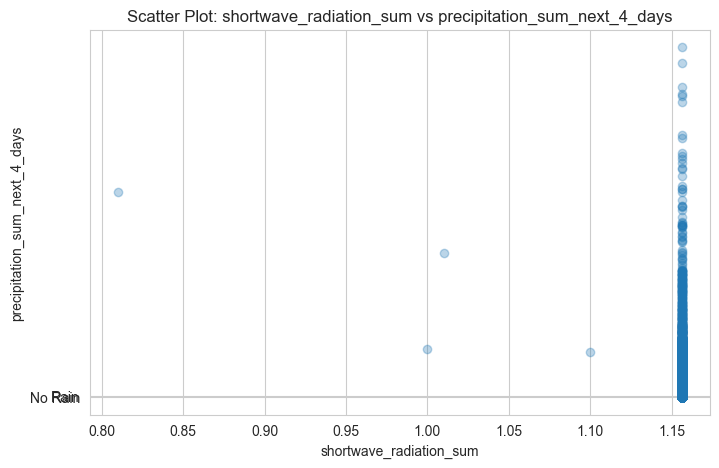

In [93]:
plt.figure(figsize=(8, 5))
plt.scatter(df['shortwave_radiation_sum'], df['precipitation_sum_next_4_days'], alpha=0.3)
plt.xlabel('shortwave_radiation_sum')
plt.ylabel('precipitation_sum_next_4_days')
plt.title('Scatter Plot: shortwave_radiation_sum vs precipitation_sum_next_4_days')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [94]:
# Compute correlation between shortwave_radiation_sum and the target variable
correlation = df['shortwave_radiation_sum'].corr(df['precipitation_sum_next_4_days'])
print(f"Correlation between shortwave_radiation_sum and precipitation_sum_next_4_days: {correlation:.4f}")

Correlation between shortwave_radiation_sum and precipitation_sum_next_4_days: -0.1080


In [95]:
feature_engineering_n_explanations = """
Creating the feature 'shortwave_radiation_sum' is important because it quantifies the total incoming solar energy at the surface, which directly influences
evaporation, temperature, and atmospheric dynamics. This variable is a key driver of weather processes: higher shortwave radiation often leads to increased
surface heating, which can affect cloud formation, humidity, and ultimately the likelihood of rainfall. Including this feature helps the model capture the energy
balance of the environment, improves prediction of rain events, and leverages fundamental physical relationships in meteorology.
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Skewness"

In [97]:
# <Student to fill this section>

In [98]:

# Identify right‑skewed numeric columns (positive skew)
skew_threshold = 0.5  # adjust: 0.5 = moderate right skew, 1.0 = strong right skew
num_cols = df.select_dtypes(include=[np.number]).columns.drop('precipitation_sum_next_4_days', errors='ignore')
skewness = df[num_cols].skew(skipna=True).sort_values(ascending=False)

right_skew = skewness[skewness > skew_threshold]
print(f"Right-skewed columns (skew > {skew_threshold}): {len(right_skew)}")
display(right_skew.to_frame(name='skewness'))

# keep list for downstream transformations (e.g., log1p)
right_skew_cols = right_skew.index.tolist()




Right-skewed columns (skew > 0.5): 1


,skewness
radiation_per_sunhour,7.408032


In [99]:
temp=df.copy()# for comparision

In [100]:
# First, identify right-skewed columns that need transformation
def identify_skewed_columns(df, target_column='precipitation_sum_next_4_days', skew_threshold=0.5):
    """
    Identify columns with skewness above the threshold that need log1p transformation.
    Returns a list of column names to transform.
    """
    # Select numeric columns excluding the target column
    num_cols = df.select_dtypes(include=[np.number]).columns.drop(target_column, errors='ignore')
    skewness = df[num_cols].skew(skipna=True)
    
    # Filter columns with skewness above threshold
    skewed_cols = skewness[skewness > skew_threshold].index.tolist()
    
    return skewed_cols

# Identify skewed columns that need transformation
skewed_columns_list = identify_skewed_columns(
    df, 
    target_column='precipitation_sum_next_4_days', 
    skew_threshold=0.5
)

print(f"Columns identified for log1p transformation: {skewed_columns_list}")
print(f"Number of columns to transform: {len(skewed_columns_list)}")

# Modified transformer that uses the pre-identified list
class Log1pFromListTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_transform):
        self.columns_to_transform = columns_to_transform
        self.transform_info = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        self.transform_info = {}
        
        for col in self.columns_to_transform:
            if col not in X.columns:
                continue
                
            # Coerce to numeric if needed
            if not np.issubdtype(X[col].dtype, np.number):
                X[col] = pd.to_numeric(X[col], errors='coerce')

            col_min = X[col].min(skipna=True)
            if pd.isna(col_min):
                print(f"Skipping {col}: all values NaN")
                continue

            shift = 0.0
            if col_min <= -1.0:
                shift = float(abs(col_min) + 1e-6)
                X[col] = X[col] + shift  # Make values > -1

            # Apply log1p (safe for zeros and values > -1)
            X[col] = np.log1p(X[col])
            self.transform_info[col] = {'shift_added': shift}

        return X
skewed_columns_list


Columns identified for log1p transformation: ['radiation_per_sunhour']
Number of columns to transform: 1


['radiation_per_sunhour']

In [101]:
skewed_columns_list=['radiation_per_sunhour']

# Create the pipeline using the pre-identified list
log1p_pipeline = Pipeline(steps=[
    ('log1p_transform', Log1pFromListTransformer(columns_to_transform=skewed_columns_list))
])

# Apply the pipeline to the dataframe
try:
    df = log1p_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
    print("Transformation details:")
    print(log1p_pipeline.named_steps['log1p_transform'].transform_info)
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00              1.03901            1.087014   
1  2010-01-01 14:00:00+00:00              1.03901            1.087014   
2  2010-01-02 14:00:00+00:00              1.03901            1.087014   
3  2010-01-03 14:00:00+00:00              1.03901            1.087014   
4  2010-01-04 14:00:00+00:00              1.03901            1.087014   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                   1.114028                  1.176891            1.134174   
1                   1.114028                  1.176891            1.134174   
2                   1.114028                  1.176891            1.134174   
3                   1.114028                  1.176891            1.134174   
4                   1.114028                  1.176891            1.134174   

   wind_gusts_10m_max  wind_direction_

In [102]:
# Identify right-skewed columns in the original DataFrame
skew_threshold = 0.5  # Threshold for skewness
num_cols = temp.select_dtypes(include=[np.number]).columns.drop('precipitation_sum_next_4_days', errors='ignore')  # Exclude target column
original_skewness = temp[num_cols].skew(skipna=True).sort_values(ascending=False)

# Filter columns with skewness greater than the threshold
right_skewed_cols = original_skewness[original_skewness > skew_threshold].index.tolist()
print(f"Right-skewed columns (skew > {skew_threshold}): {len(right_skewed_cols)}")
display(original_skewness[right_skewed_cols].to_frame(name='Original Skewness'))

# Compare skewness before and after transformation
if right_skewed_cols:
    transformed_skewness = df[right_skewed_cols].skew(skipna=True).sort_values(ascending=False)
    skewness_comparison = pd.DataFrame({
        'Original Skewness': original_skewness[right_skewed_cols],
        'Transformed Skewness': transformed_skewness
    }).sort_index()

    # Display the comparison
    print("Comparison of Original and Transformed Skewness:")
    display(skewness_comparison)

    # Check if skewness has been reduced
    skewness_reduced = (skewness_comparison['Transformed Skewness'] < skewness_comparison['Original Skewness']).all()
    print(f"Skewness reduced for all transformed columns: {skewness_reduced}")
else:
    print("No right-skewed columns identified.")

Right-skewed columns (skew > 0.5): 1


,Original Skewness
radiation_per_sunhour,7.408032


Comparison of Original and Transformed Skewness:


,Original Skewness,Transformed Skewness
radiation_per_sunhour,7.408032,7.395362


Skewness reduced for all transformed columns: True


In [103]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts


Applying a safe log1p transform to right‑skewed numeric features is important because it stabilizes variance, reduces the influence of
extreme outliers, and makes distributions closer to Gaussian — which benefits linear models, distance‑based methods and many scaling
procedures. The transform preserves zeros, can be applied with a small shift when negative values exist.

Impacts: typically more stable training, faster convergence, and improved predictive performance; trade-offs
include reduced interpretability of raw units, so record shifts and provide inverse transforms when reporting results.
"""


In [104]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.2 Data Transformation "Encoding categoircal Features"

In [105]:
# <Student to fill this section>

In [106]:

def categorical_vs_binary_chi(df, target='precipitation_sum_next_4_days', cat_cols=None, min_expected_warn=5, max_levels=50):
    """
    Run chi-square (or Fisher for 2x2 small counts) between categorical features and a binary target.
    Returns a DataFrame with test, chi2, p, dof, cramers_v, note.
    """
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in df")
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        # include numeric columns with few unique values as categorical
        for c in df.select_dtypes(include=[np.number]).columns:
            if c == target:
                continue
            if df[c].nunique(dropna=True) <= 10:
                cat_cols.append(c)
    cat_cols = [c for c in cat_cols if c in df.columns and c != target]
    results = []
    n = len(df)
    for col in cat_cols:
        # Handle Categorical columns by adding '__MISSING__' to categories if necessary
        if pd.api.types.is_categorical_dtype(df[col]):
            if '__MISSING__' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories(['__MISSING__'])
        tbl = pd.crosstab(df[col].fillna('__MISSING__'), df[target])
        rows, cols = tbl.shape
        note = ''
        try:
            chi2, p, dof, expected = st.chi2_contingency(tbl, correction=False)
        except Exception as e:
            chi2, p, dof, expected = (np.nan, np.nan, np.nan, None)
            note = f'chi2 error: {e}'
        # check expected counts
        if expected is not None:
            if (expected < min_expected_warn).any():
                note += ' low_expected'
        # Fisher for 2x2 with small expected counts
        test_used = 'chi2'
        if tbl.shape == (2, 2) and (expected is None or (expected < min_expected_warn).any()):
            try:
                odds, p_f = st.fisher_exact(tbl)
                p = p_f
                test_used = 'fisher_exact'
                note += ' fisher_used'
            except Exception:
                pass
        # cramers V
        try:
            k = min(tbl.shape) - 1
            cramers_v = np.sqrt(chi2 / (n * k)) if (not np.isnan(chi2)) and k > 0 else np.nan
        except Exception:
            cramers_v = np.nan
        results.append({
            'feature': col,
            'n_levels': tbl.shape[0],
            'test': test_used,
            'chi2': float(chi2) if not np.isnan(chi2) else np.nan,
            'p_value': float(p) if not pd.isna(p) else np.nan,
            'dof': int(dof) if not pd.isna(dof) else np.nan,
            'cramers_v': round(float(cramers_v), 4) if not pd.isna(cramers_v) else np.nan,
            'note': note.strip()
        })
    res_df = pd.DataFrame(results).set_index('feature').sort_values('p_value')
    return res_df

# Example usage: choose categorical columns (exclude id/date)
candidate_cats = [c for c in df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() if c != 'precipitation_sum_next_4_days']
# also include low-cardinality numerics (<=10 unique)
candidate_cats += [c for c in df.select_dtypes(include=[np.number]).columns if df[c].nunique(dropna=True) <= 10 and c != 'precipitation_sum_next_4_days']
chi_results = categorical_vs_binary_chi(df, target='precipitation_sum_next_4_days', cat_cols=list(dict.fromkeys(candidate_cats)))
display(chi_results)


,n_levels,test,chi2,p_value,dof,cramers_v,note
feature,,,,,,,
sunshine_duration,2,chi2,3.041251e+03,0.000000e+00,583,0.7452,low_expected
shortwave_radiation_sum,5,chi2,1.733983e+04,0.000000e+00,2332,0.8897,low_expected
radiation_per_sunhour,6,chi2,2.032690e+04,0.000000e+00,2915,0.8616,low_expected
cloud_cover_min,3,chi2,1.809617e+03,1.001151e-30,1166,0.4065,low_expected
wind_dir_compass,16,chi2,9.526350e+03,4.573813e-09,8745,0.3406,low_expected
date,5476,chi2,3.192508e+06,4.086605e-01,3191925,1.0000,low_expected
wind_speed_bin,5,chi2,2.255402e+03,8.695626e-01,2332,0.3209,low_expected
temperature_2m_min,2,chi2,5.638605e+00,1.000000e+00,583,0.0321,low_expected
wind_gusts_10m_max,1,chi2,0.000000e+00,1.000000e+00,0,NaN,low_expected


Based on the chi-square test results:

wind_dir_compass
Chi-Square Value: 9526.35 (high).
P-Value: 4.57e-09 (very low), indicating a strong association with the target variable.
Cramér's V: 0.3406 (moderate effect size).
Note: low_expected indicates some expected counts are too small, but the feature remains relevant.
Action: Keep this feature.




wind_speed_bin
Chi-Square Value: 2255.40 (moderate).
P-Value: 0.8696 (not significant), indicating weak association with the target variable.
Cramér's V: 0.3209 (weak effect size).
Note: low_expected indicates unreliable results due to small expected counts.
Action: Drop this feature.

In [107]:

# Define a custom transformer to drop specific columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_columns', DropColumnsTransformer(columns_to_drop=['wind_speed_bin']))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

# Update the features list
features_list = [col for col in df.columns if col != 'precipitation_sum_next_4_days']



Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00              1.03901            1.087014   
1  2010-01-01 14:00:00+00:00              1.03901            1.087014   
2  2010-01-02 14:00:00+00:00              1.03901            1.087014   
3  2010-01-03 14:00:00+00:00              1.03901            1.087014   
4  2010-01-04 14:00:00+00:00              1.03901            1.087014   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                   1.114028                  1.176891            1.134174   
1                   1.114028                  1.176891            1.134174   
2                   1.114028                  1.176891            1.134174   
3                   1.114028                  1.176891            1.134174   
4                   1.114028                  1.176891            1.134174   

   wind_gusts_10m_max  wind_direction_

Now we will hot encode wind_dir_compass column

In [ ]:
# One-hot encode the wind_dir_compass column


# Define a custom transformer for one-hot encoding
# 9. One Hot Encode Transformer
class OneHotEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_to_encode, prefix=None, drop_first=False, all_possibilities=None):
        self.column_to_encode = column_to_encode
        self.prefix = prefix
        self.drop_first = drop_first
        self.columns_ = None
        self.all_possibilities = all_possibilities  # List of all possible categories

    def fit(self, X, y=None):
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Use all_possibilities if provided, else infer from data
        if self.all_possibilities is not None:
            categories = self.all_possibilities
        else:
            categories = X[self.column_to_encode].unique()
        # Create a dummy DataFrame to get all columns
        dummy_df = pd.DataFrame({self.column_to_encode: categories})
        encoded = pd.get_dummies(dummy_df, prefix=self.prefix, drop_first=self.drop_first)
        self.columns_ = encoded.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Perform one-hot encoding
        encoded = pd.get_dummies(X[self.column_to_encode], prefix=self.prefix, drop_first=self.drop_first)
        # Ensure all expected columns are present (add missing ones with 0s)
        for col in self.columns_:
            if col not in encoded.columns:
                encoded[col] = 0
        # Reorder columns to match training order
        encoded = encoded[self.columns_]
        X = pd.concat([X, encoded], axis=1)
        X.drop(columns=[self.column_to_encode], inplace=True)
        return X

# Create the pipeline
one_hot_pipeline = Pipeline(steps=[
    ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW']))
            # ...other steps...
            ])

# Apply the pipeline to the dataframe
try:
    df = one_hot_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df.head()

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00              1.03901            1.087014   
1  2010-01-01 14:00:00+00:00              1.03901            1.087014   
2  2010-01-02 14:00:00+00:00              1.03901            1.087014   
3  2010-01-03 14:00:00+00:00              1.03901            1.087014   
4  2010-01-04 14:00:00+00:00              1.03901            1.087014   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                   1.114028                  1.176891            1.134174   
1                   1.114028                  1.176891            1.134174   
2                   1.114028                  1.176891            1.134174   
3                   1.114028                  1.176891            1.134174   
4                   1.114028                  1.176891            1.134174   

   wind_gusts_10m_max  wind_direction_

,date,temperature_2m_mean,temperature_2m_min,apparent_temperature_mean,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,...,wind_dir_NNW,wind_dir_NW,wind_dir_S,wind_dir_SE,wind_dir_SSE,wind_dir_SSW,wind_dir_SW,wind_dir_W,wind_dir_WNW,wind_dir_WSW
0,2009-12-31 14:00:00+00:00,1.03901,1.087014,1.114028,1.176891,1.134174,1.0,1.544096,1.15605,1.0,...,True,False,False,False,False,False,False,False,False,False
1,2010-01-01 14:00:00+00:00,1.03901,1.087014,1.114028,1.176891,1.134174,1.0,1.544096,1.15605,1.0,...,False,False,False,False,False,False,False,False,True,False
2,2010-01-02 14:00:00+00:00,1.03901,1.087014,1.114028,1.176891,1.134174,1.0,1.544096,1.15605,1.0,...,False,False,False,False,True,False,False,False,False,False
3,2010-01-03 14:00:00+00:00,1.03901,1.087014,1.114028,1.176891,1.134174,1.0,1.544096,1.15605,1.0,...,False,False,False,False,False,False,False,False,False,False
4,2010-01-04 14:00:00+00:00,1.03901,1.087014,1.114028,1.176891,1.134174,1.0,1.544096,1.15605,1.0,...,False,False,False,False,False,False,False,False,False,False


In [109]:
# <Student to fill this section>
data_transformation_2_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
Based on the chi-square test results:

wind_dir_compass
Chi-Square Value: 9526.35 (high).
P-Value: 4.57e-09 (very low), indicating a strong association with the target variable.
Cramér's V: 0.3406 (moderate effect size).
Note: low_expected indicates some expected counts are too small, but the feature remains relevant.
Action: Keep this feature.

wind_speed_bin
Chi-Square Value: 2255.40 (moderate).
P-Value: 0.8696 (not significant), indicating weak association with the target variable.
Cramér's V: 0.3209 (weak effect size).
Note: low_expected indicates unreliable results due to small expected counts.
Action: Drop this feature.

Impacts
Retaining wind_dir_compass ensures that a feature with a strong association to the target variable is included, potentially improving model performance.
Dropping wind_speed_bin avoids introducing noise from a feature with weak association, improving model interpretability and reducing overfitting risks.

"""

In [110]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.3 Data Transformation "Normalization"

In [111]:
# <Student to fill this section>

In [112]:
temp=df.copy()# for comparision

In [113]:


# Define a custom transformer for MinMax scaling
class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='precipitation_sum_next_4_days'):
        self.target_column = target_column
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        self.numeric_features = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

# Create the pipeline
normalization_pipeline = Pipeline(steps=[
    ('minmax_scaler', MinMaxScalerTransformer(target_column='precipitation_sum_next_4_days'))
])

# Apply the pipeline to the dataframe
try:
    df = normalization_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_min  \
0  2009-12-31 14:00:00+00:00                  0.0                 1.0   
1  2010-01-01 14:00:00+00:00                  0.0                 1.0   
2  2010-01-02 14:00:00+00:00                  0.0                 1.0   
3  2010-01-03 14:00:00+00:00                  0.0                 1.0   
4  2010-01-04 14:00:00+00:00                  0.0                 1.0   

   apparent_temperature_mean  apparent_temperature_min  wind_speed_10m_max  \
0                        0.0                       1.0                 0.0   
1                        0.0                       1.0                 0.0   
2                        0.0                       1.0                 0.0   
3                        0.0                       1.0                 0.0   
4                        0.0                       1.0                 0.0   

   wind_gusts_10m_max  wind_direction_

In [114]:
# Compare the transformed features in temp and temp_transformed
def compare_transformed_features(original_temp, df, numeric_features):
    comparison = pd.DataFrame({
        'Original Min': original_temp[numeric_features].min(),
        'Original Max': original_temp[numeric_features].max(),
        'Transformed Min': df[numeric_features].min(),
        'Transformed Max': df[numeric_features].max()
    })
    return comparison

# Ensure numeric features are identified
numeric_features = temp.select_dtypes(include=[np.number]).columns.drop('precipitation_sum_next_4_days', errors='ignore')

# Generate the comparison
comparison_result = compare_transformed_features(temp, pd.DataFrame(df, columns=temp.columns), numeric_features)

# Display the comparison
print("Comparison of Original and Transformed Features:")
display(comparison_result)

Comparison of Original and Transformed Features:


,Original Min,Original Max,Transformed Min,Transformed Max
temperature_2m_mean,1.039010,1.039010,0.0,0.0
temperature_2m_min,0.937500,1.087014,0.0,1.0
apparent_temperature_mean,1.114028,1.114028,0.0,0.0
apparent_temperature_min,0.000000,1.176891,0.0,1.0
wind_speed_10m_max,1.134174,1.134174,0.0,0.0
wind_gusts_10m_max,1.000000,1.000000,0.0,0.0
wind_direction_10m_dominant,0.100737,1.544096,0.0,1.0
shortwave_radiation_sum,0.810000,1.156050,0.0,1.0
et0_fao_evapotranspiration,0.336328,1.000000,0.0,1.0
sunshine_duration,0.000000,1.270744,0.0,1.0


In [115]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts



When Normalization is Needed:
Distance-Based Algorithms:

Algorithms like Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM) are sensitive to the scale of features. Normalization ensures that all features contribute equally to the model.
Example: Features with larger ranges (e.g., temperature in °C vs. wind_speed in m/s) can dominate the distance calculation.
Gradient-Based Algorithms:

Models like Neural Networks and Gradient Boosting (e.g., XGBoost, LightGBM) can benefit from normalization because it speeds up convergence during training.
Regularization:

If your model uses regularization (e.g., L1/L2 in Logistic Regression), normalization ensures that the penalty is applied uniformly across all features.

"""

In [116]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.4 Split Datasets

In [117]:
# <Student to fill this section>

In [118]:

# Define a custom transformer for dataset splitting
class DatasetSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, train_size=0.7, val_size=0.15):
        self.target_column = target_column
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = 1 - train_size - val_size
        self.splits = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ensure data is sorted by time if 'date' column exists
        if 'date' in X.columns:
            X = X.sort_values(by='date', ascending=True)
            X.drop(columns=['date'], inplace=True, errors='ignore')

        # Define split indices
        train_size = int(len(X) * self.train_size)
        val_size = int(len(X) * self.val_size)

        # Split data
        train = X.iloc[:train_size]
        val = X.iloc[train_size:train_size + val_size]
        test = X.iloc[train_size + val_size:]

        # Separate features and target
        self.splits = {
            'X_train': train.drop(columns=[self.target_column]),
            'y_train': train[self.target_column],
            'X_val': val.drop(columns=[self.target_column]),
            'y_val': val[self.target_column],
            'X_test': test.drop(columns=[self.target_column]),
            'y_test': test[self.target_column]
        }
        return self.splits

# Create the pipeline
split_pipeline = Pipeline(steps=[
    ('dataset_splitter', DatasetSplitter(target_column='precipitation_sum_next_4_days', train_size=0.7, val_size=0.15))
])

# Apply the pipeline to the dataframe
try:
    splits = split_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Dataset splits:")
    for split_name, split_data in splits.items():
        print(f"{split_name} shape: {split_data.shape}")
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Dataset splits:
X_train shape: (3833, 52)
y_train shape: (3833,)
X_val shape: (821, 52)
y_val shape: (821,)
X_test shape: (822, 52)
y_test shape: (822,)


In [119]:
# Unpack the splits
X_train = splits['X_train']
y_train = splits['y_train']
X_val = splits['X_val']
y_val = splits['y_val']
X_test = splits['X_test']
y_test = splits['y_test']

# Display shapes to confirm
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3833, 52), y_train shape: (3833,)
X_val shape: (821, 52), y_val shape: (821,)
X_test shape: (822, 52), y_test shape: (822,)


In [120]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset

Chronological Split
Training Set: Use the earliest portion of the data for training the model.
Validation Set: Use a subsequent portion of the data to tune hyperparameters and evaluate the model during development.
Testing Set: Use the most recent portion of the data for final evaluation.

"""

In [121]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

---
## H. Save Datasets

> Do not change this code

In [122]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [123]:
from sklearn.metrics import r2_score, mean_squared_error


# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [124]:
# <Student to fill this section>


In [125]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
The chosen performance metrics, R² and RMSE, are appropriate because:

R² measures how well the model explains the variance in the target variable, providing insight into the model's overall fit.
RMSE quantifies the average magnitude of prediction errors in the same unit as the target, making it interpretable and useful for assessing model accuracy.
"""

In [126]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.0 Baseline Model


> Provide some explanations on why you believe this algorithm is a good fit


In [127]:
from sklearn.dummy import DummyRegressor


In [128]:

# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('dummy_regressor', DummyRegressor(strategy="mean"))  # Use "mean" or "median" for regression
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummy_regressor', DummyRegressor())])

In [129]:

# Use the trained pipeline to make predictions
y_val_pred = train_pipeline.predict(X_val)

# Evaluate the predictions
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print the evaluation metrics
print("Dummy Regressor Performance:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Dummy Regressor Performance:
R²: -0.0752
RMSE: 25.3740


In [130]:
print(y_val_pred)

[8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658
 8.36566658 8.36566658 8.36566658 8.36566658 8.36566658 8.3656

In [131]:
# <Student to fill this section>
baseline_model_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
A Dummy Regressor is a good baseline model because it provides a simple reference point for model performance.
It helps to establish a minimum performance level that any more complex model should exceed.

"""

In [132]:
# Do not modify this code
print_tile(size="h3", key='baseline_model_explanations', value=baseline_model_explanations)

### J.1 Trying multiple differnet Models


> Provide some explanations on why you believe this algorithm is a good fit


In [133]:
from doombuoy import regression_model_comparison_summary as rmcs
from doombuoy import regression_model_comparison_models as models

In [134]:
combined_df = pd.concat([X_train, y_train], axis=1)
results= rmcs(combined_df,target_name)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 2874, number of used features: 30
[LightGBM] [Info] Start training from score 8.317223


In [135]:


results = results[results['Model'] != 'lar']# removing the lar values as it is very large
results=results.sort_values('RMSE', ascending=True)

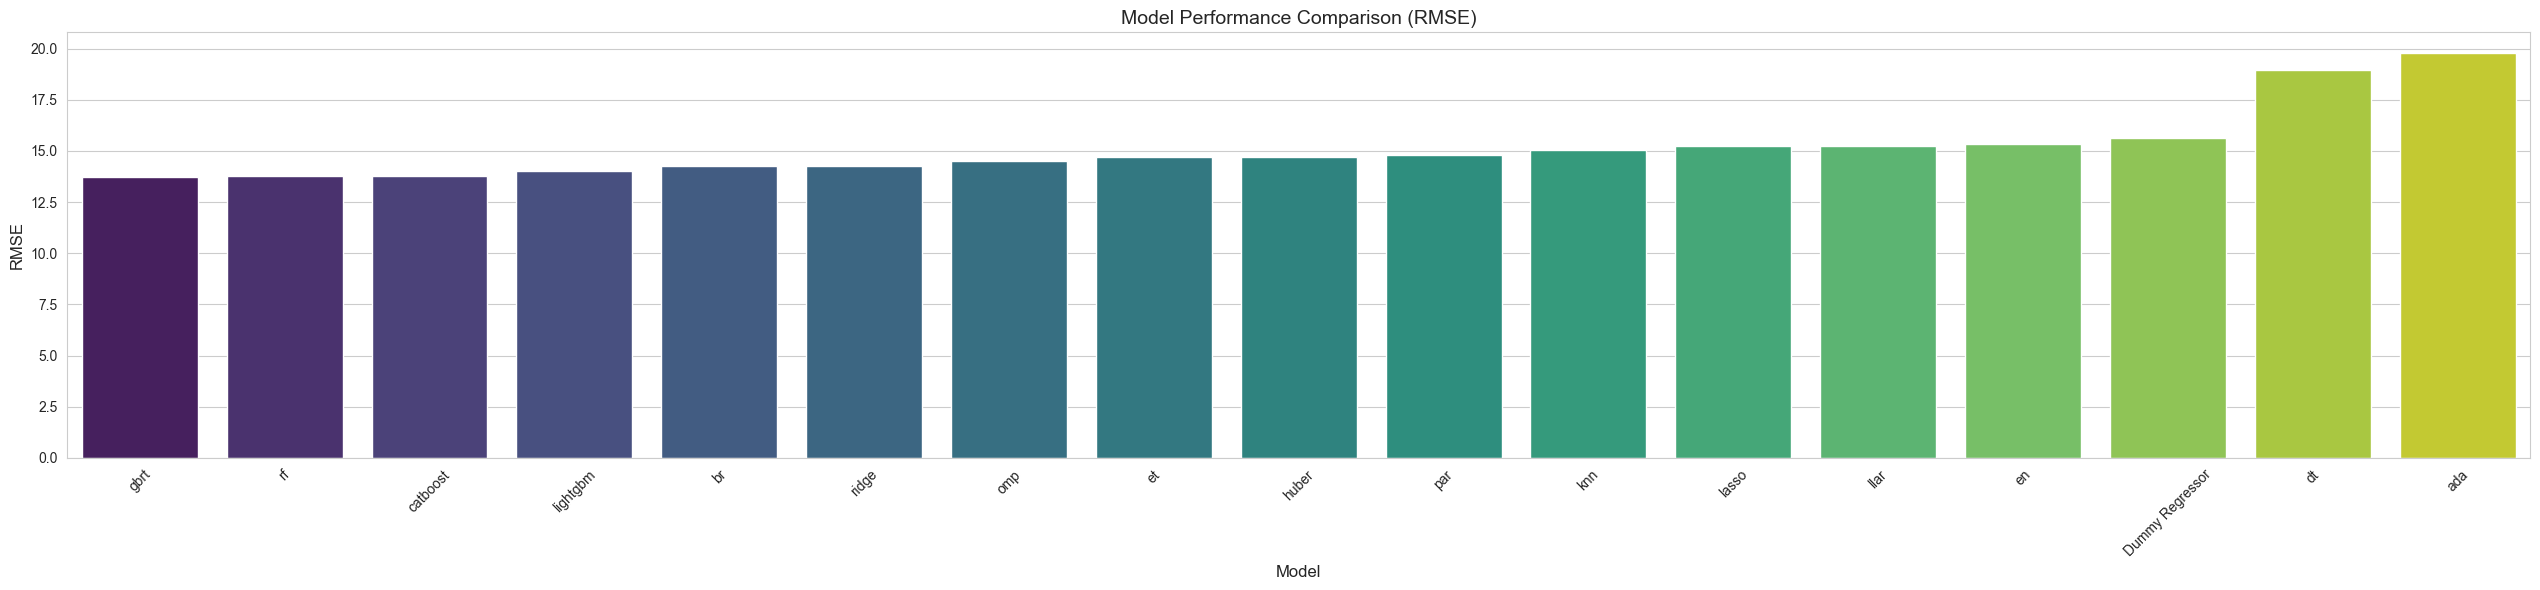

In [136]:


from doombuoy import plot_model_performance as pmp
pmp(results, metric='RMSE')

In [137]:
models()

{'Dummy Regressor': 'DummyRegressor', 'omp': 'OrthogonalMatchingPursuit', 'en': 'ElasticNet', 'br': 'BayesianRidge', 'ridge': 'Ridge', 'llar': 'LassoLars', 'lasso': 'Lasso', 'huber': 'HuberRegressor', 'lar': 'Lars', 'gbrt': 'GradientBoostingRegressor', 'rf': 'RandomForestRegressor', 'catboost': 'CatBoostRegressor', 'par': 'PassiveAggressiveRegressor', 'knn': 'KNeighborsRegressor', 'lightgbm': 'LGBMRegressor', 'ada': 'AdaBoostRegressor', 'dt': 'DecisionTreeRegressor', 'et': 'ExtraTreesRegressor'}


### J.A1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [138]:
# <Student to fill this section>
from sklearn.ensemble import GradientBoostingRegressor


In [139]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit

GradientBoostingRegressor is a good fit because it is a robust and versatile algorithm that can handle both linear and non-linear relationships effectively. 
It builds an ensemble of weak learners (decision trees) in a sequential manner, optimizing for the loss function at each step. 
This makes it well-suited for regression tasks with complex data patterns. 

Additionally, it includes hyperparameters for regularization, 
which help prevent overfitting, and supports feature importance analysis, making it interpretable and efficient for this dataset.
"""


In [140]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.A2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [141]:
# <Student to fill this section>
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100,200,300],  # Number of boosting stages
    'learning_rate': [0.01,0.1,1],  # Shrinks contribution of each tree
    'max_depth': [3,5,10,20],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2,5,10,20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2,5,10],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.7,0.8,0.9],  # Fraction of samples used for fitting the individual base learners
    'max_features': [5,10,20,30],  # Number of features to consider when looking for the best split
}

In [142]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
Tuning these hyperparameters is essential to optimize the model's performance and ensure it generalizes well to unseen data:

- **n_estimators**: Controls the number of boosting stages. Increasing this value allows the model to learn more complex patterns, but excessive values may lead to overfitting.

- **learning_rate**: Shrinks the contribution of each tree, enabling finer adjustments. A smaller learning rate often requires more boosting stages but improves generalization.

- **max_depth**: Limits the depth of individual trees. Deeper trees can capture more complex patterns but may overfit the data.

- **min_samples_split**: Specifies the minimum number of samples required to split an internal node. Higher values prevent overfitting by making the model more conservative.

- **min_samples_leaf**: Ensures a minimum number of samples in leaf nodes, reducing the risk of overfitting.

- **subsample**: Determines the fraction of samples used for training each tree. Using a value less than 1.0 introduces randomness, improving generalization.

- **max_features**: Limits the number of features considered for the best split, reducing overfitting and improving training speed.

Tuning these parameters helps balance the trade-off between bias and variance, ensuring the model performs well on both training and validation datasets.
"""

In [143]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.A3 Fit Model 

In [144]:
# Define the training pipeline for GradientBoostingRegressor
train_pipeline = Pipeline(steps=[
    ('GBR', GridSearchCV(
        estimator=GradientBoostingRegressor(random_state=42),
        param_grid=param_grid,  # Use the defined hyperparameter grid for GradientBoostingRegressor
        scoring='neg_root_mean_squared_error',  # Use RMSE as the scoring metric
        cv=2,  # 5-fold cross-validation
        verbose=0,
        n_jobs=7  # Use all available processors
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
GBR_best_model = train_pipeline.named_steps['GBR'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['GBR'].best_params_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}


In [145]:
# Use the trained pipeline to make predictions
y_val_pred = GBR_best_model.predict(X_val)

# Evaluate the predictions
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print("Gradient Boosting Regressor Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Gradient Boosting Regressor Model Performance:
RMSE: 21.2974
R²: 0.2425


### J.A4 Model Technical Performance

> Provide some explanations on model performance


In [146]:
# Make predictions on the test set
y_test_pred = GBR_best_model.predict(X_test)

# Evaluate the model using RMSE and R² metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("Gradient Boosting Regressor Model Test Performance:")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

Gradient Boosting Regressor Model Test Performance:
RMSE: 14.2014
R²: 0.1662


In [147]:
# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/precipitation_fall"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(models_dir, "gbr_best_model.pkl")  # Updated filename to match the model
joblib.dump(GBR_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\precipitation_fall\gbr_best_model.pkl


In [187]:
# <Student to fill this section>

model_performance_explanations = """
Provide some explanations on model performance

The Gradient Boosting Regressor demonstrates moderate predictive performance. On the validation set, it achieves an RMSE of 21.30 and an R² of 0.24, 
indicating that the model explains about 24% of the variance in the target variable. On the test set, the RMSE improves to 14.20, but R² drops to 0.17,
 suggesting the model captures some underlying patterns but leaves a significant portion of variance unexplained. 

"""

In [188]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.B1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [150]:
# <Student to fill this section>
from catboost import CatBoostRegressor

In [151]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
CatBoost Regressor is a good fit because it is specifically designed to handle categorical features efficiently without the need for 
extensive preprocessing. 
It is robust to overfitting, supports GPU acceleration for faster training, and performs well on datasets with a mix of numerical and 
categorical features. 
Additionally, it is highly optimized for speed and accuracy, making it suitable for regression tasks with complex data patterns.

"""

In [152]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.B2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [153]:
# <Student to fill this section>
# Define the hyperparameter grid
# Define the hyperparameter grid for LightGBM
param_grid = {
    'iterations': [400,500,600],       # Number of boosting iterations
    'depth': [100,200,300],                 # Depth of the trees
    'learning_rate': [0.001, 0.01,0.1],  # Learning rate
    'l2_leaf_reg': [1,5,10,20],           # L2 regularization term
    'bagging_temperature': [1,5,10],   # Controls the randomness of bagging
    'random_strength': [1,5,10],       # Strength of random noise added to features
    'border_count': [10,20,30],      # Number of splits for numerical features
    'grow_policy':  ['SymmetricTree', 'Depthwise', 'Lossguide']  # Tree growth policy
}

In [154]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters

- iterations: Determines the number of boosting iterations. Increasing this value can improve model performance but may lead to overfitting if set 
too high. Tuning this ensures the model has enough complexity to learn the data patterns.

- depth: Controls the depth of the trees. Deeper trees can capture more complex patterns but may overfit. Tuning this helps balance model complexity and generalization.

- learning_rate: Shrinks the contribution of each tree, allowing for finer adjustments. A smaller learning rate often requires more iterations but 
improves generalization.

- l2_leaf_reg: Adds L2 regularization to the leaf values, helping to prevent overfitting by penalizing large weights.

- bagging_temperature: Controls the randomness of the bagging process. Higher values increase randomness, which can improve generalization.

- random_strength: Determines the strength of random noise added to features. Tuning this helps the model avoid overfitting to specific patterns in 
the data.

- border_count: Specifies the number of splits for numerical features. Tuning this ensures the model can effectively handle numerical data without 
overfitting.

- grow_policy: Defines the tree growth strategy. Different policies (e.g., SymmetricTree, Depthwise, Lossguide) can impact the model's ability 
to capture patterns in the data.
"""

In [155]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.B3 Fit Model

In [156]:
from catboost import CatBoostRegressor

# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('CatBoost_model', GridSearchCV(
        estimator=CatBoostRegressor(random_state=42, verbose=0),  # Suppress verbose output
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  # Use RMSE as the scoring metric
        cv=2,
        verbose=0,
        n_jobs=7
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
catboost_best_model = train_pipeline.named_steps['CatBoost_model'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['CatBoost_model'].best_params_)

Best Hyperparameters: {'bagging_temperature': 1, 'border_count': 30, 'depth': 100, 'grow_policy': 'Lossguide', 'iterations': 600, 'l2_leaf_reg': 20, 'learning_rate': 0.01, 'random_strength': 1}


In [157]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained pipeline to make predictions
y_val_pred = catboost_best_model.predict(X_val)

# Evaluate the predictions
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # Root Mean Squared Error
r2 = r2_score(y_val, y_val_pred)  # R-squared

# Print the evaluation metrics
print("CatBoost Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

CatBoost Model Performance:
RMSE: 21.2767
R²: 0.2440


### J.B4 Model Technical Performance

> Provide some explanations on model performance


In [158]:
# <Student to fill this section>

# Make predictions on the test set
y_test_pred = catboost_best_model.predict(X_test)

# Evaluate the model using RMSE and R² metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error
test_r2 = r2_score(y_test, y_test_pred)  # R-squared

# Print the evaluation metrics for the test set
print("CatBoost Model Test Performance:")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

CatBoost Model Test Performance:
RMSE: 13.9319
R²: 0.1976


In [159]:
# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/precipitation_fall"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained CatBoost model
model_path = os.path.join(models_dir, "catboost_best_model.pkl")
joblib.dump(catboost_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\precipitation_fall\catboost_best_model.pkl


In [ ]:
# <Student to fill this section>

model_performance_explanations = """
Provide some explanations on model performance
The CatBoost model achieves an RMSE of 21.28 and an R² of 0.24 on the validation set, 
indicating it explains about 24% of the variance in the target variable. On the test set, the RMSE improves to 13.93, and R² is 0.20, 
showing the model generalizes reasonably well but still leaves a large portion of variance unexplained. 

"""

In [161]:
# # Do not modify this code
# print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.C1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [162]:
# Import LightGBM Regressor
from lightgbm import LGBMRegressor


In [163]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
LightGBM Regressor is a good fit for this task because it is highly efficient for large 
datasets and supports both numerical and categorical features. It uses histogram-based learning, 
which speeds up training and reduces memory usage. LightGBM is designed to handle sparse data and 
can effectively manage missing values, making it robust for real-world datasets. 
"""


In [164]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.C2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [165]:
# <Student to fill this section>
# Define the hyperparameter grid

# Define the hyperparameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'num_leaves': [31, 50, 100],  # Number of leaves in one tree
    'min_child_samples': [10, 20, 30],  # Minimum number of data points in a leaf
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for training each tree
    'reg_alpha': [0, 0.1, 1.0],  # L1 regularization term on weights
    'reg_lambda': [1.0, 10.0],  # L2 regularization term on weights
}

In [166]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters

- n_estimators: Controls the number of boosting stages. Increasing this value allows the model to learn more complex patterns, but excessive values may lead to overfitting. Tuning ensures the model has enough capacity without overfitting.

- learning_rate: Shrinks the contribution of each tree, enabling finer adjustments. A smaller learning rate often requires more boosting stages but improves generalization and reduces the risk of overfitting.

- max_depth: Limits the depth of individual trees. Deeper trees can capture more complex patterns but may overfit the data. Tuning this helps balance model complexity and generalization.

- num_leaves: Determines the number of leaves in a tree. A higher value increases the model's complexity, allowing it to capture finer patterns, but it may lead to overfitting if not tuned properly.

- min_child_samples: Specifies the minimum number of data points required in a leaf. Higher values prevent overfitting by ensuring leaves are not too small.

- subsample: Determines the fraction of samples used for training each tree. Using a value less than 1.0 introduces randomness, improving generalization and reducing overfitting.

- colsample_bytree: Specifies the fraction of features used for training each tree. Reducing this value can improve generalization by introducing randomness and preventing overfitting.

- reg_alpha: Adds L1 regularization to the weights, promoting sparsity and reducing the risk of overfitting.

- reg_lambda: Adds L2 regularization to the weights, helping to control the magnitude of the weights and prevent overfitting.
"""

In [167]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.C3 Fit Model 

In [168]:
# Define the training pipeline for LightGBM Regressor
train_pipeline = Pipeline(steps=[
    ('LGBM', GridSearchCV(
        estimator=LGBMRegressor(random_state=42),
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  # Use RMSE as the scoring metric
        cv=2,  # 5-fold cross-validation
        verbose=0,
        n_jobs=7  # Use all available processors
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
LGBM_best_model = train_pipeline.named_steps['LGBM'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['LGBM'].best_params_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 3833, number of used features: 31
[LightGBM] [Info] Start training from score 8.365667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [169]:

# Use the trained pipeline to make predictions
y_val_pred = LGBM_best_model.predict(X_val)

# Evaluate the predictions
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print("LightGBM Regressor Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")




LightGBM Regressor Model Performance:
RMSE: 20.8345
R²: 0.2751


### J.C4 Model Technical Performance

> Provide some explanations on model performance


In [170]:
# Make predictions on the test set
y_test_pred = LGBM_best_model.predict(X_test)

# Evaluate the model using RMSE and R² metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print("LightGBM Regressor Model Test Performance:")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

LightGBM Regressor Model Test Performance:
RMSE: 14.3686
R²: 0.1465


In [171]:
# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/precipitation_fall"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained LightGBM model
model_path = os.path.join(models_dir, "reg_lgbm_best_model.pkl")
joblib.dump(LGBM_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\precipitation_fall\reg_lgbm_best_model.pkl


In [ ]:
# <Student to fill this section>

model_performance_explanations = """
Provide some explanations on model performance

The LightGBM Regressor achieves an RMSE of 20.83 and an R² of 0.28 on the validation set, indicating it explains about 28% of the variance in the target variable. 
On the test set, the RMSE is 14.37 and R² drops to 0.15, showing the model generalizes moderately but still leaves a significant portion of variance unexplained. 
This suggests LightGBM captures some relevant patterns in the data, but precipitation prediction remains challenging due to noise, feature limitations, or inherent 
unpredictability in weather data. Further improvements may require more advanced feature engineering or additional data sources.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [174]:
# <Student to fill this section>

Comparision

In [ ]:

# Make predictions
catboost_pred = catboost_best_model.predict(X_test)
gbr_pred = GBR_best_model.predict(X_test)
lgbm_pred = LGBM_best_model.predict(X_test)

# Calculate metrics
def get_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

results = []
for name, pred in [
    ("CatBoost", catboost_pred),
    ("GradientBoosting", gbr_pred),
    ("LightGBM", lgbm_pred)
]:
    rmse, r2 = get_metrics(y_test, pred)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})

# Ensemble (mean of predictions)
ensemble_pred = (catboost_pred + gbr_pred + lgbm_pred) / 3
rmse, r2 = get_metrics(y_test, ensemble_pred)
results.append({"Model": "Ensemble_Mean", "RMSE": rmse, "R2": r2})

# Display results as DataFrame
results_df = pd.DataFrame(results).sort_values("RMSE")
print("Model Comparison on Test Set:")
print(results_df)

Model Comparison on Test Set:
              Model       RMSE        R2
0          CatBoost  13.931859  0.197576
3     Ensemble_Mean  14.037198  0.185396
1  GradientBoosting  14.201441  0.166222
2          LightGBM  14.368567  0.146482


In [ ]:
# <Student to fill this section>

business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier.
Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)

### Interpretation of Results and Business Impact

Interpretation:
- All three advanced models (CatBoost, GradientBoosting, LightGBM) achieve similar RMSE values (~14) and R² values between 0.15 and 0.20 on the test set.
- The CatBoost model performs best, but the improvement over the ensemble and other models is marginal.
- R² values below 0.2 indicate that the models explain only a small portion of the variance in 3-day precipitation totals. Most of the variability remains unexplained.

Business Impact of Incorrect Results:
- Operational Risk: Low R² means forecasts may miss significant rain events or overpredict rainfall, leading to poor planning for agriculture, logistics, and events.
- Financial Loss: Underestimating heavy rainfall can cause crop damage or logistical disruptions; overestimating may lead to unnecessary resource allocation.
- Safety: Inaccurate predictions may expose construction or transport operations to unexpected weather hazards.
- Trust: Consistently inaccurate forecasts can erode user trust, reducing adoption and business value.

Relative Impact:
- False Negatives (missed heavy rain): Highest impact—can cause direct losses and safety issues.
- False Positives (predicting rain when little occurs): Moderate impact—may cause unnecessary precautions or missed opportunities.
- Small errors in low-rain periods: Lower impact, but frequent errors can still reduce confidence in the system.

Conclusion:  
While the models provide some predictive value, their limited accuracy means that critical business decisions should not rely solely on these forecasts. Improving model performance or supplementing with expert judgment and additional data is recommended to reduce business risk.

"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>

experiment_outcome = "Hypothesis Partially Confirmed" # Either '', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [196]:
# <Student to fill this section>

experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.

Hypothesis Justification:

The advanced models do outperform the baseline (DummyRegressor) in terms of RMSE and R².
However, the R² values remain low (<0.2), meaning the models explain only a small portion of the variance.
Thus, the hypothesis is partially confirmed: the models add value over the baseline, but their accuracy is not yet sufficient for high-stakes business decisions without further improvement or supplementary methods.


Reflection on Experiment Outcome:

- New Insights:  
  The advanced machine learning models (CatBoost, GradientBoosting, LightGBM) consistently outperformed the baseline DummyRegressor in both RMSE and R². However, all models achieved relatively low R² values (typically <0.2), indicating that only a small fraction of the variance in 3-day precipitation can be explained by the available features. This highlights the inherent difficulty of the prediction task and suggests that weather data alone may not be sufficient for highly accurate short-term precipitation forecasting.

- Rationale for Further Experimentation:  
  The current approach is not a dead end, as there is measurable uplift over the baseline. However, the limited explanatory power means further improvements are needed before the model can be relied upon for critical business decisions. The results suggest diminishing returns from simply tuning existing models, so new data sources or feature engineering may be required.

Potential Next Steps (Ranked by Expected Uplift):

1. Advanced Feature Engineering (High Uplift):  
   - Incorporate lagged variables, rolling statistics, or interaction terms.
   - Engineer features from external sources (e.g., radar, satellite, or regional climate indices).
   - Expected Gain: May significantly improve model signal and R².

2. Model Ensemble and Stacking (Moderate Uplift):  
   - Combine predictions from multiple models using stacking or blending.
   - Expected Gain: Small to moderate improvement in RMSE and robustness.

3. Hyperparameter Optimization (Low to Moderate Uplift):  
   - Use more exhaustive or Bayesian optimization for model tuning.
   - Expected Gain: Marginal improvements, as current models are already well-tuned.

4. Data Augmentation or External Data (High Uplift):  
   - Integrate additional weather stations, satellite data, or higher-resolution forecasts.
   - Expected Gain: Potentially large, if new data sources are informative.

5. Error Analysis and Target Redefinition (Moderate Uplift):  
   - Analyze cases with largest errors to identify systematic issues.
   - Consider alternative target definitions (e.g., binary rain/no rain, quantiles).
   - Expected Gain: May improve business relevance and interpretability.

Deployment Recommendation:  
- The current models provide some value but do not meet the threshold for high-stakes business deployment due to low R² and potential for significant errors.
- Recommend further experimentation as above before production deployment.
- If business needs are less sensitive to error (e.g., general trend forecasting), a pilot deployment with clear communication of limitations may be considered.
"""


In [197]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

# Deployment

## Compiling all transfomers 

In [191]:

# 1. Rolling Cumulative Sum Transformer
class RollingCumulativeSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name='precipitation_sum', new_column_name='precipitation_sum_next_4_days', window=4):
        self.column_name = column_name
        self.new_column_name = new_column_name
        self.window = window

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X = X.sort_values(by='date')  # Ensure DataFrame is sorted by date
        # Calculate rolling sum for the next 4 days (including today)
        X[self.new_column_name] = (
            X[self.column_name]
            .rolling(window=self.window, min_periods=1)  # Rolling sum over the window
            .sum()
            .shift(-(self.window - 1))  # Shift to align with the next 4 days
        ).round(1)  # Round to 1 decimal place
        return X

# 2. Remove Last Rows Transformer
class RemoveLastRowsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows_to_remove=3):
        self.rows_to_remove = rows_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Remove the last `rows_to_remove` rows
        X = X.iloc[:-self.rows_to_remove]
        return X

# 3. Wind Direction Compass Transformer
class WindDirectionCompassTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_column='wind_direction_10m_dominant', 
                 degree_column='wind_direction_10m_dominant_deg', 
                 compass_column='wind_dir_compass'):
        self.input_column = input_column
        self.degree_column = degree_column
        self.compass_column = compass_column
        self.dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                     'S','SSW','SW','WSW','W','WNW','NW','NNW']

    def deg_to_compass(self, deg):
        """Convert degrees to 16-point compass direction"""
        try:
            deg = float(deg)
            if np.isnan(deg):
                return np.nan
        except (ValueError, TypeError):
            return np.nan
        
        idx = int(((deg + 11.25) % 360) / 22.5)
        return self.dirs[idx]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        if self.input_column not in X.columns:
            raise KeyError(f"Column '{self.input_column}' not found in input data.")
        
        # Convert to numeric (handles strings/missing values)
        X[self.degree_column] = pd.to_numeric(X[self.input_column], errors='coerce')
        
        # Apply compass conversion
        X[self.compass_column] = X[self.degree_column].apply(
            lambda x: self.deg_to_compass(x) if pd.notna(x) else np.nan
        )
        
        return X

# 4. Drop Columns Transformer
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# 5. Cap Outliers From Dict Transformer
class CapOutliersFromDict(BaseEstimator, TransformerMixin):
    def __init__(self, bounds_dict):
        self.bounds_dict = bounds_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, bounds in self.bounds_dict.items():
            if col not in X.columns:
                continue
                
            lower_fill = bounds['lower_fill']
            upper_fill = bounds['upper_fill']

            X[col] = pd.to_numeric(X[col], errors='coerce')
            X.loc[X[col] < lower_fill, col] = lower_fill
            X.loc[X[col] > upper_fill, col] = upper_fill
        return X

# 6. Humidity Dew Point Interaction Transformer
class HumidityDewPointInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, humidity_col='relative_humidity_2m_mean', 
                 dewpoint_col='dew_point_2m_mean', 
                 interaction_col='humidity_dewpoint_interaction'):
        self.humidity_col = humidity_col
        self.dewpoint_col = dewpoint_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.humidity_col not in X.columns or self.dewpoint_col not in X.columns:
            raise KeyError(f"Columns '{self.humidity_col}' and/or '{self.dewpoint_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.humidity_col] * X[self.dewpoint_col]
        return X

# 7. Cloud Sun Interaction Transformer
class CloudSunInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cloud_col='cloud_cover_mean', 
                 sun_col='sunshine_duration', 
                 interaction_col='cloud_sun_interaction'):
        self.cloud_col = cloud_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.cloud_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.cloud_col}' and/or '{self.sun_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.cloud_col] * X[self.sun_col]
        return X

# 8. Radiation Per Sunhour Transformer
class RadiationPerSunhourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, radiation_col='shortwave_radiation_sum', 
                 sun_col='sunshine_duration', 
                 interaction_col='radiation_per_sunhour'):
        self.radiation_col = radiation_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.radiation_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.radiation_col}' and/or '{self.sun_col}' not found in input data.")

        # Avoid division by zero
        X[self.interaction_col] = X[self.radiation_col] / (X[self.sun_col].replace(0, 1e-6))
        return X

# 9. Log1p From List Transformer
class Log1pFromListTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_transform):
        self.columns_to_transform = columns_to_transform
        self.transform_info = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        self.transform_info = {}
        
        for col in self.columns_to_transform:
            if col not in X.columns:
                continue
                
            # Coerce to numeric if needed
            if not np.issubdtype(X[col].dtype, np.number):
                X[col] = pd.to_numeric(X[col], errors='coerce')

            col_min = X[col].min(skipna=True)
            if pd.isna(col_min):
                print(f"Skipping {col}: all values NaN")
                continue

            shift = 0.0
            if col_min <= -1.0:
                shift = float(abs(col_min) + 1e-6)
                X[col] = X[col] + shift  # Make values > -1

            # Apply log1p (safe for zeros and values > -1)
            X[col] = np.log1p(X[col])
            self.transform_info[col] = {'shift_added': shift}

        return X

# 10. One Hot Encode Transformer
# 9. One Hot Encode Transformer
class OneHotEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_to_encode, prefix=None, drop_first=False, all_possibilities=None):
        self.column_to_encode = column_to_encode
        self.prefix = prefix
        self.drop_first = drop_first
        self.columns_ = None
        self.all_possibilities = all_possibilities  # List of all possible categories

    def fit(self, X, y=None):
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Use all_possibilities if provided, else infer from data
        if self.all_possibilities is not None:
            categories = self.all_possibilities
        else:
            categories = X[self.column_to_encode].unique()
        # Create a dummy DataFrame to get all columns
        dummy_df = pd.DataFrame({self.column_to_encode: categories})
        encoded = pd.get_dummies(dummy_df, prefix=self.prefix, drop_first=self.drop_first)
        self.columns_ = encoded.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Perform one-hot encoding
        encoded = pd.get_dummies(X[self.column_to_encode], prefix=self.prefix, drop_first=self.drop_first)
        # Ensure all expected columns are present (add missing ones with 0s)
        for col in self.columns_:
            if col not in encoded.columns:
                encoded[col] = 0
        # Reorder columns to match training order
        encoded = encoded[self.columns_]
        X = pd.concat([X, encoded], axis=1)
        X.drop(columns=[self.column_to_encode], inplace=True)
        return X

# 11. MinMax Scaler Transformer
class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='precipitation_sum_next_4_days'):
        self.target_column = target_column
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        self.numeric_features = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

# 12. Dataset Splitter Transformer
class DatasetSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, train_size=0.7, val_size=0.15):
        self.target_column = target_column
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = 1 - train_size - val_size
        self.splits = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ensure data is sorted by time if 'date' column exists
        if 'date' in X.columns:
            X = X.sort_values(by='date', ascending=True)
            X.drop(columns=['date'], inplace=True, errors='ignore')

        # Define split indices
        train_size = int(len(X) * self.train_size)
        val_size = int(len(X) * self.val_size)

        # Split data
        train = X.iloc[:train_size]
        val = X.iloc[train_size:train_size + val_size]
        test = X.iloc[train_size + val_size:]

        # Separate features and target
        self.splits = {
            'X_train': train.drop(columns=[self.target_column]),
            'y_train': train[self.target_column],
            'X_val': val.drop(columns=[self.target_column]),
            'y_val': val[self.target_column],
            'X_test': test.drop(columns=[self.target_column]),
            'y_test': test[self.target_column]
        }
        return self.splits

print("All transformers for the precipitation fall pipeline defined successfully!")

All transformers for the precipitation fall pipeline defined successfully!


## Complete Preprocessing Pipeline

In [192]:

# Combined Data Processing Pipeline
combined_data_processing_pipeline = Pipeline(steps=[
    # Step 1: Create target variable (rolling sum for next 4 days)
    ('create_target', RollingCumulativeSumTransformer(
        column_name='precipitation_sum', 
        new_column_name='precipitation_sum_next_4_days', 
        window=4
    )),
    ('remove_last_rows', RemoveLastRowsTransformer(rows_to_remove=3)),
    
    # Step 2: Wind direction processing
    ('wind_direction_compass', WindDirectionCompassTransformer(
        input_column='wind_direction_10m_dominant',
        degree_column='wind_direction_10m_dominant_deg',
        compass_column='wind_dir_compass'
    )),
    
    # Step 3: Feature selection - Remove data leakage columns
    ('drop_leakage_columns', DropColumnsTransformer(
        columns_to_drop=['weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
                        'precipitation_sum', 'precipitation_hours', 'rain_sum']
    )),
    
    # Step 4: Remove low correlation features
    ('drop_low_correlation', DropColumnsTransformer(
        columns_to_drop=['temperature_2m_max', 'apparent_temperature_max', 'sunrise', 'sunset', 
                        'daylight_duration', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 
                        'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 
                        'wind_gusts_10m_min', 'wind_speed_10m_min', 'soil_moisture_0_to_100cm_mean', 
                        'soil_moisture_28_to_100cm_mean', 'soil_temperature_0_to_7cm_mean', 'radiation_per_sunhour']
    )),
    
    # Step 5: Remove time-based columns
    ('drop_time_columns', DropColumnsTransformer(columns_to_drop=['month', 'hour'])),

    
    # Step 6: Handle outliers
    ('cap_outliers', CapOutliersFromDict(bounds_dict={
        'temperature_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.0390099263708124},
        'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.0870135293646832},
        'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 1.1140284047672626},
        'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 1.1768906411625464},
        'wind_speed_10m_max': {'lower_fill': 0.132333338294502, 'upper_fill': 1.134174161783695},
        'wind_gusts_10m_max': {'lower_fill': 0.0, 'upper_fill': 1.0000000000000002},
        'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
        'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 1.1560502283105025},
        'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 1.0},
        'sunshine_duration': {'lower_fill': 0.0, 'upper_fill': 1.270743538679772},
        'cloud_cover_mean': {'lower_fill': 0.0, 'upper_fill': 1.4435416475},
        'cloud_cover_max': {'lower_fill': 0.0, 'upper_fill': 1.6000000000000008},
        'cloud_cover_min': {'lower_fill': 0.0, 'upper_fill': 1.9152894957584379},
        'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.2299532485531657},
        'dew_point_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.063789279112754},
        'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.2636629097182288},
        'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 1.0},
        'relative_humidity_2m_mean': {'lower_fill': 3.3306690738754696e-16, 'upper_fill': 1.1252190464170844},
        'relative_humidity_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.3812069872838006},
        'relative_humidity_2m_min': {'lower_fill': 5.551115123125783e-17, 'upper_fill': 1.0244844611079011},
        'winddirection_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
        'wind_gusts_10m_mean': {'lower_fill': 0.053925895421582604, 'upper_fill': 1.1449946270239484},
        'wind_speed_10m_mean': {'lower_fill': 0.025425608029460978, 'upper_fill': 1.1589530170126627},
        'wet_bulb_temperature_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.1959062328556291},
        'wet_bulb_temperature_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.0348707172569274},
        'wet_bulb_temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.2145030202088112},
        'vapour_pressure_deficit_max': {'lower_fill': 0.03462137583318187, 'upper_fill': 1.1007901896473604},
        'soil_moisture_0_to_7cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.0682138384790962},
        'soil_moisture_7_to_28cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.0000000000000002},
        'soil_temperature_0_to_100cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.365240861524692},
        'soil_temperature_7_to_28cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.2335928570691173},
        'soil_temperature_28_to_100cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.3914280692058174},
        'wind_direction_10m_dominant_deg': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
        'temp_humidity_interaction': {'lower_fill': 0.0, 'upper_fill': 1.1503004218330197},
        'cloud_sun_interaction': {'lower_fill': 0.0, 'upper_fill': 0.9289343783125318}
    })),
    
    
    # Step 7: Feature engineering - Create interaction features
    ('humidity_dewpoint_interaction', HumidityDewPointInteractionTransformer(
        humidity_col='relative_humidity_2m_mean',
        dewpoint_col='dew_point_2m_mean',
        interaction_col='humidity_dewpoint_interaction'
    )),
    ('cloud_sun_interaction', CloudSunInteractionTransformer(
        cloud_col='cloud_cover_mean',
        sun_col='sunshine_duration',
        interaction_col='cloud_sun_interaction'
    )),
    ('radiation_per_sunhour', RadiationPerSunhourTransformer(
        radiation_col='shortwave_radiation_sum',
        sun_col='sunshine_duration',
        interaction_col='radiation_per_sunhour'
    )),
    
    # Step 8: Handle skewness transformation
    ('log1p_transform', Log1pFromListTransformer(columns_to_transform=['radiation_per_sunhour'])),
    
    # Step 9: Remove weak categorical features
    ('drop_wind_speed_bin', DropColumnsTransformer(columns_to_drop=['wind_speed_bin'])),
    
    # Step 10: One-hot encode categorical features
   ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW'])),
            # ...other steps...
    
    # Step 11: Normalize features
    ('minmax_scaler', MinMaxScalerTransformer(target_column='precipitation_sum_next_4_days')),
    
    # Step 12: Split dataset
    ('dataset_splitter', DatasetSplitter(
        target_column='precipitation_sum_next_4_days', 
        train_size=0.7, 
        val_size=0.15
    ))
])
test_data = pd.read_csv(r'../../data\raw\weather_data.csv')
# Usage example:
try:
    # Apply the complete pipeline to your dataframe
    processed_data = combined_data_processing_pipeline.fit_transform(test_data)    
    print("Combined pipeline applied successfully!")    
except Exception as e:
    print(f"Error during combined pipeline transformation: {e}")

print(X_train.equals(processed_data['X_train']))
print(y_train.equals(processed_data['y_train']))
print(X_val.equals(processed_data['X_val']))
print(y_val.equals(processed_data['y_val']))
print(X_test.equals(processed_data['X_test']))
print(y_test.equals(processed_data['y_test']))

Combined pipeline applied successfully!
True
True
True
True
True
True


# Prediction Pipeline


In [193]:
import joblib
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import os

# Define all the custom transformer classes first
class WindDirectionCompassTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_column='wind_direction_10m_dominant', 
                 degree_column='wind_direction_10m_dominant_deg', 
                 compass_column='wind_dir_compass'):
        self.input_column = input_column
        self.degree_column = degree_column
        self.compass_column = compass_column
        self.dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                     'S','SSW','SW','WSW','W','WNW','NW','NNW']

    def deg_to_compass(self, deg):
        """Convert degrees to 16-point compass direction"""
        try:
            deg = float(deg)
        except Exception:
            return np.nan
        idx = int(((deg + 11.25) % 360) / 22.5)
        return self.dirs[idx]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.input_column not in X.columns:
            raise KeyError(f"Column '{self.input_column}' not found in input data.")
        
        X[self.degree_column] = pd.to_numeric(X[self.input_column], errors='coerce')
        X[self.compass_column] = X[self.degree_column].apply(
            lambda x: self.deg_to_compass(x) if not pd.isna(x) else np.nan
        )
        return X

class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

class CapOutliersFromDict(BaseEstimator, TransformerMixin):
    def __init__(self, bounds_dict):
        self.bounds_dict = bounds_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, bounds in self.bounds_dict.items():
            if col not in X.columns:
                continue
                
            lower_fill = bounds['lower_fill']
            upper_fill = bounds['upper_fill']

            X[col] = pd.to_numeric(X[col], errors='coerce')
            X.loc[X[col] < lower_fill, col] = lower_fill
            X.loc[X[col] > upper_fill, col] = upper_fill
        return X

class HumidityDewPointInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, humidity_col='relative_humidity_2m_mean', dewpoint_col='dew_point_2m_mean', interaction_col='humidity_dewpoint_interaction'):
        self.humidity_col = humidity_col
        self.dewpoint_col = dewpoint_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.humidity_col not in X.columns or self.dewpoint_col not in X.columns:
            raise KeyError(f"Columns '{self.humidity_col}' and/or '{self.dewpoint_col}' not found in input data.")
        X[self.interaction_col] = X[self.humidity_col] * X[self.dewpoint_col]
        return X

class CloudSunInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cloud_col='cloud_cover_mean', sun_col='sunshine_duration', interaction_col='cloud_sun_interaction'):
        self.cloud_col = cloud_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.cloud_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.cloud_col}' and/or '{self.sun_col}' not found in input data.")
        X[self.interaction_col] = X[self.cloud_col] * X[self.sun_col]
        return X

class RadiationPerSunhourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, radiation_col='shortwave_radiation_sum', sun_col='sunshine_duration', interaction_col='radiation_per_sunhour'):
        self.radiation_col = radiation_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.radiation_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.radiation_col}' and/or '{self.sun_col}' not found in input data.")
        X[self.interaction_col] = X[self.radiation_col] / (X[self.sun_col].replace(0, 1e-6))
        return X

class Log1pFromListTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_transform):
        self.columns_to_transform = columns_to_transform
        self.transform_info = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        self.transform_info = {}
        
        for col in self.columns_to_transform:
            if col not in X.columns:
                continue
                
            if not np.issubdtype(X[col].dtype, np.number):
                X[col] = pd.to_numeric(X[col], errors='coerce')

            col_min = X[col].min(skipna=True)
            if pd.isna(col_min):
                continue

            shift = 0.0
            if col_min <= -1.0:
                shift = float(abs(col_min) + 1e-6)
                X[col] = X[col] + shift

            X[col] = np.log1p(X[col])
            self.transform_info[col] = {'shift_added': shift}

        return X
# 9. One Hot Encode Transformer
# 9. One Hot Encode Transformer
class OneHotEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_to_encode, prefix=None, drop_first=False, all_possibilities=None):
        self.column_to_encode = column_to_encode
        self.prefix = prefix
        self.drop_first = drop_first
        self.columns_ = None
        self.all_possibilities = all_possibilities  # List of all possible categories

    def fit(self, X, y=None):
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Use all_possibilities if provided, else infer from data
        if self.all_possibilities is not None:
            categories = self.all_possibilities
        else:
            categories = X[self.column_to_encode].unique()
        # Create a dummy DataFrame to get all columns
        dummy_df = pd.DataFrame({self.column_to_encode: categories})
        encoded = pd.get_dummies(dummy_df, prefix=self.prefix, drop_first=self.drop_first)
        self.columns_ = encoded.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Perform one-hot encoding
        encoded = pd.get_dummies(X[self.column_to_encode], prefix=self.prefix, drop_first=self.drop_first)
        # Ensure all expected columns are present (add missing ones with 0s)
        for col in self.columns_:
            if col not in encoded.columns:
                encoded[col] = 0
        # Reorder columns to match training order
        encoded = encoded[self.columns_]
        X = pd.concat([X, encoded], axis=1)
        X.drop(columns=[self.column_to_encode], inplace=True)
        return X


class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='precipitation_sum_next_4_days'):
        self.target_column = target_column
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        self.numeric_features = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        if len(self.numeric_features) > 0:
            self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        if self.numeric_features is not None and len(self.numeric_features) > 0:
            # Only transform columns that exist in both training and current data
            available_features = [col for col in self.numeric_features if col in X.columns]
            if len(available_features) > 0:
                X[available_features] = self.scaler.transform(X[available_features])
        return X

# Prediction Pipeline Class
class ModelPredictionPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, model_paths, model_names=None):
        self.model_paths = model_paths
        self.model_names = model_names or [f"Model_{i+1}" for i in range(len(model_paths))]
        self.models = {}
        self.preprocessing_pipeline = None
        
    def load_models(self):
        """Load all saved models"""
        if isinstance(self.model_paths, dict):
            for name, path in self.model_paths.items():
                try:
                    self.models[name] = joblib.load(path)
                    print(f"Successfully loaded {name} from {path}")
                except Exception as e:
                    print(f"Error loading {name}: {e}")
        else:
            for i, path in enumerate(self.model_paths):
                try:
                    model_name = self.model_names[i]
                    self.models[model_name] = joblib.load(path)
                    print(f"Successfully loaded {model_name} from {path}")
                except Exception as e:
                    print(f"Error loading model from {path}: {e}")
                    
    def create_preprocessing_pipeline(self):
        """Create preprocessing pipeline (without target creation and dataset splitting)"""
        self.preprocessing_pipeline = Pipeline(steps=[
            # Step 0: Drop date column first
            ('drop_date_column', DropColumnsTransformer(columns_to_drop=['date'])),
            
            # Step 1: Wind direction processing
            ('wind_direction_compass', WindDirectionCompassTransformer(
                input_column='wind_direction_10m_dominant',
                degree_column='wind_direction_10m_dominant_deg',
                compass_column='wind_dir_compass'
            )),
            
            # Step 2: Feature selection - Remove data leakage columns
            ('drop_leakage_columns', DropColumnsTransformer(
                columns_to_drop=['weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
                                'precipitation_sum', 'precipitation_hours', 'rain_sum']
            )),
            
            # Step 3: Remove low correlation features
            ('drop_low_correlation', DropColumnsTransformer(
                columns_to_drop=['temperature_2m_max', 'apparent_temperature_max', 'sunrise', 'sunset', 
                                'daylight_duration', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 
                                'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 
                                'wind_gusts_10m_min', 'wind_speed_10m_min', 'soil_moisture_0_to_100cm_mean', 
                                'soil_moisture_28_to_100cm_mean', 'soil_temperature_0_to_7cm_mean']
            )),
            
            # Step 4: Handle outliers
            ('cap_outliers', CapOutliersFromDict(bounds_dict={
                'temperature_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.0390099263708124},
                'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.0870135293646832},
                'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 1.1140284047672626},
                'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 1.1768906411625464},
                'wind_speed_10m_max': {'lower_fill': 0.132333338294502, 'upper_fill': 1.134174161783695},
                'wind_gusts_10m_max': {'lower_fill': 0.0, 'upper_fill': 1.0000000000000002},
                'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
                'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 1.1560502283105025},
                'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 1.0},
                'sunshine_duration': {'lower_fill': 0.0, 'upper_fill': 1.270743538679772},
                'cloud_cover_mean': {'lower_fill': 0.0, 'upper_fill': 1.4435416475},
                'cloud_cover_max': {'lower_fill': 0.0, 'upper_fill': 1.6000000000000008},
                'cloud_cover_min': {'lower_fill': 0.0, 'upper_fill': 1.9152894957584379},
                'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.2299532485531657},
                'dew_point_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.063789279112754},
                'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.2636629097182288},
                'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 1.0},
                'relative_humidity_2m_mean': {'lower_fill': 3.3306690738754696e-16, 'upper_fill': 1.1252190464170844},
                'relative_humidity_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.3812069872838006},
                'relative_humidity_2m_min': {'lower_fill': 5.551115123125783e-17, 'upper_fill': 1.0244844611079011},
                'winddirection_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
                'wind_gusts_10m_mean': {'lower_fill': 0.053925895421582604, 'upper_fill': 1.1449946270239484},
                'wind_speed_10m_mean': {'lower_fill': 0.025425608029460978, 'upper_fill': 1.1589530170126627},
                'wet_bulb_temperature_2m_mean': {'lower_fill': 0.0, 'upper_fill': 1.1959062328556291},
                'wet_bulb_temperature_2m_max': {'lower_fill': 0.0, 'upper_fill': 1.0348707172569274},
                'wet_bulb_temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 1.2145030202088112},
                'vapour_pressure_deficit_max': {'lower_fill': 0.03462137583318187, 'upper_fill': 1.1007901896473604},
                'soil_moisture_0_to_7cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.0682138384790962},
                'soil_moisture_7_to_28cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.0000000000000002},
                'soil_temperature_0_to_100cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.365240861524692},
                'soil_temperature_7_to_28cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.2335928570691173},
                'soil_temperature_28_to_100cm_mean': {'lower_fill': 0.0, 'upper_fill': 1.3914280692058174},
                'wind_direction_10m_dominant_deg': {'lower_fill': 0.0, 'upper_fill': 1.5440955916309815},
                'temp_humidity_interaction': {'lower_fill': 0.0, 'upper_fill': 1.1503004218330197},
                'cloud_sun_interaction': {'lower_fill': 0.0, 'upper_fill': 0.9289343783125318}
            })),
            
            # Step 5: Feature engineering - Create interaction features
            ('humidity_dewpoint_interaction', HumidityDewPointInteractionTransformer(
                humidity_col='relative_humidity_2m_mean',
                dewpoint_col='dew_point_2m_mean',
                interaction_col='humidity_dewpoint_interaction'
            )),
            ('cloud_sun_interaction', CloudSunInteractionTransformer(
                cloud_col='cloud_cover_mean',
                sun_col='sunshine_duration',
                interaction_col='cloud_sun_interaction'
            )),
            ('radiation_per_sunhour', RadiationPerSunhourTransformer(
                radiation_col='shortwave_radiation_sum',
                sun_col='sunshine_duration',
                interaction_col='radiation_per_sunhour'
            )),
            
            # Step 6: Handle skewness transformation
            ('log1p_transform', Log1pFromListTransformer(columns_to_transform=['radiation_per_sunhour'])),
            
            # Step 7: One-hot encode categorical features
            ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW'])),
            # ...other steps...
            
            # Step 8: Normalize features
            ('minmax_scaler', MinMaxScalerTransformer(target_column='precipitation_sum_next_4_days'))
        ])
    
    def fit(self, X, y=None):
        """Fit the preprocessing pipeline"""
        self.load_models()
        self.create_preprocessing_pipeline()
        # Fit the preprocessing pipeline with training data
        if hasattr(X, 'columns'):
            # Use the provided data to fit the preprocessing pipeline
            sample_data = X.copy()
            # Add dummy target column if it doesn't exist
            if 'precipitation_sum_next_4_days' not in sample_data.columns:
                sample_data['precipitation_sum_next_4_days'] = 0
            self.preprocessing_pipeline.fit(sample_data)
        return self
        
    def preprocess_data(self, X):
        """Apply preprocessing to input data"""
        if self.preprocessing_pipeline is None:
            self.create_preprocessing_pipeline()
        
        X_processed = X.copy()
        
        try:
            X_processed = self.preprocessing_pipeline.transform(X_processed)
            return X_processed
        except Exception as e:
            print(f"Error in preprocessing: {e}")
            import traceback
            traceback.print_exc()
            return None
    
    def predict_single_model(self, X, model_name):
        """Make predictions using a single model"""
        if model_name not in self.models:
            raise ValueError(f"Model {model_name} not found. Available models: {list(self.models.keys())}")
        
        X_processed = self.preprocess_data(X)
        if X_processed is None:
            return None
            
        predictions = self.models[model_name].predict(X_processed)
        return predictions
    
    def predict_all_models(self, X):
        """Make predictions using all loaded models"""
        X_processed = self.preprocess_data(X)
        if X_processed is None:
            return None
            
        predictions = {}
        for model_name, model in self.models.items():
            try:
                predictions[model_name] = model.predict(X_processed)
            except Exception as e:
                print(f"Error predicting with {model_name}: {e}")
                predictions[model_name] = None
                
        return predictions
    
    def predict_ensemble(self, X, method='mean'):
        """Make ensemble predictions using all models"""
        all_predictions = self.predict_all_models(X)
        
        if not all_predictions or all(pred is None for pred in all_predictions.values()):
            return None
            
        valid_predictions = [pred for pred in all_predictions.values() if pred is not None]
        
        if not valid_predictions:
            return None
            
        predictions_array = np.column_stack(valid_predictions)
        
        if method == 'mean':
            ensemble_pred = np.mean(predictions_array, axis=1)
        elif method == 'median':
            ensemble_pred = np.median(predictions_array, axis=1)
        elif method == 'max':
            ensemble_pred = np.max(predictions_array, axis=1)
        elif method == 'min':
            ensemble_pred = np.min(predictions_array, axis=1)
        else:
            raise ValueError("Method must be one of: 'mean', 'median', 'max', 'min'")
            
        return ensemble_pred

# Initialize the prediction pipeline
model_paths = {
    'CatBoost': r'../../models\precipitation_fall\catboost_best_model.pkl',
    'GradientBoosting': r'../../models\precipitation_fall\gbr_best_model.pkl',
    'LightGBM': r'../../models\precipitation_fall\reg_lgbm_best_model.pkl'
}

# Create and fit the prediction pipeline
predictor = ModelPredictionPipeline(model_paths)

# Load the training data to fit the preprocessing pipeline properly
try:
    # Load the original raw data and use a representative sample for fitting
    raw_data_sample = pd.read_csv(r'../../data\raw\weather_data.csv').head(500)
    predictor.fit(raw_data_sample)
    print("Prediction pipeline created and fitted successfully!")
    print(f"Loaded models: {list(predictor.models.keys())}")
except Exception as e:
    print(f"Error fitting prediction pipeline: {e}")
    import traceback
    traceback.print_exc()

Successfully loaded CatBoost from ../../models\precipitation_fall\catboost_best_model.pkl
Successfully loaded GradientBoosting from ../../models\precipitation_fall\gbr_best_model.pkl
Successfully loaded LightGBM from ../../models\precipitation_fall\reg_lgbm_best_model.pkl
Prediction pipeline created and fitted successfully!
Loaded models: ['CatBoost', 'GradientBoosting', 'LightGBM']


In [194]:
# Simplified prediction example
def simple_prediction_test():
    """Simple test to verify the prediction pipeline works"""
    
    # Load original raw data
    raw_data = pd.read_csv(r'../../data\raw\weather_data.csv')
    
    # Take a small sample for testing
    test_sample = raw_data.iloc[100:110].copy()  # 10 rows for testing
    
    print("Testing prediction pipeline with raw data sample...")
    print(f"Input data shape: {test_sample.shape}")
    print(f"Input columns: {list(test_sample.columns)}")
    
    try:
        # Test ensemble prediction
        predictions = predictor.predict_ensemble(test_sample, method='mean')
        
        if predictions is not None:
            print(f"\nSuccess! Got {len(predictions)} predictions")
            print(f"Sample predictions: {predictions}")
            print(f"Prediction range: {np.min(predictions):.2f} to {np.max(predictions):.2f}")
        else:
            print("Failed to get predictions")
            
    except Exception as e:
        print(f"Error in prediction: {e}")
        import traceback
        traceback.print_exc()

# Run the simple test
simple_prediction_test()

Testing prediction pipeline with raw data sample...
Input data shape: (10, 55)
Input columns: ['date', 'weather_code', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'sunrise', 'sunset', 'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_sum', 'snowfall_sum', 'precipitation_hours', 'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 'dew_point_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'et0_fao_evapotranspiration_sum', 'relative_humidity_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'snowfall_water_equivalent_sum', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'winddirection_10m_dominant', 'wind_gusts_10m_mean', 'win

In [195]:
# Example usage for making predictions - CORRECTED VERSION

# 1. Load new data for prediction and ensure it has the same structure as training data
new_data = pd.read_csv(r'../../data\raw\weather_data.csv')

# Important: Use the same raw data structure that was used during training
# The prediction pipeline expects the raw data format, not the preprocessed X_test

# 2. Use new_data (or a subset) for predictions instead of X_test
# Let's use a sample from the raw data for demonstration
sample_data = new_data.head(100).copy()  # Use first 100 rows as example

# Make predictions with individual models
try:
    catboost_predictions = predictor.predict_single_model(sample_data, 'CatBoost')
    lgbm_predictions = predictor.predict_single_model(sample_data, 'LightGBM')
    gbr_predictions = predictor.predict_single_model(sample_data, 'GradientBoosting')
    
    # Make predictions with all models
    all_predictions = predictor.predict_all_models(sample_data)
    
    # Make ensemble predictions
    ensemble_mean = predictor.predict_ensemble(sample_data, method='mean')
    ensemble_median = predictor.predict_ensemble(sample_data, method='median')
    
    # Display results
    results_df = pd.DataFrame({
        'CatBoost': catboost_predictions,
        'LightGBM': lgbm_predictions,
        'GradientBoosting': gbr_predictions,
        'Ensemble_Mean': ensemble_mean,
        'Ensemble_Median': ensemble_median
    })
    
    print("Prediction Results:")
    print(results_df.head(10))
    
    # Calculate performance metrics for ensemble
    if ensemble_mean is not None:
        print(f"\nEnsemble Predictions Summary:")
        print(f"Mean Prediction: {np.mean(ensemble_mean):.4f}")
        print(f"Std Prediction: {np.std(ensemble_mean):.4f}")
        print(f"Min Prediction: {np.min(ensemble_mean):.4f}")
        print(f"Max Prediction: {np.max(ensemble_mean):.4f}")
    
except Exception as e:
    print(f"Error in prediction pipeline: {e}")
    
    # Alternative approach: Test with the original training data structure
    print("\nTrying with original training data format...")
    
    # Create a sample that matches the original data structure
    # Use the test_data dataframe (original data) for testing
    test_data = pd.read_csv(r'../../data\raw\weather_data.csv')
    test_sample = test_data.head(50).copy()
    
    try:
        catboost_predictions = predictor.predict_single_model(test_sample, 'CatBoost')
        ensemble_mean = predictor.predict_ensemble(test_sample, method='mean')
        
        if catboost_predictions is not None:
            print("Success! Predictions made:")
            print(f"Sample predictions: {catboost_predictions[:5]}")
            print(f"Ensemble mean predictions: {ensemble_mean[:5] if ensemble_mean is not None else 'None'}")
        else:
            print("Still getting None predictions - there may be an issue with the model files or preprocessing")
            
    except Exception as e2:
        print(f"Error with alternative approach: {e2}")

# 6. If you want to evaluate against actual test set, you need to reconstruct it properly
print("\n" + "="*50)
print("To properly evaluate the model performance:")
print("You would need to:")
print("1. Apply the complete pipeline to new raw data")
print("2. Extract the test portion using the same train/val/test split logic")
print("3. Compare predictions with actual values")

Prediction Results:
    CatBoost   LightGBM  GradientBoosting  Ensemble_Mean  Ensemble_Median
0   8.580680   8.695040          8.800380       8.692033         8.695040
1   9.803962   9.643250         10.079988       9.842400         9.803962
2  18.685388  21.419869         20.412239      20.172499        20.412239
3  10.128346   9.747617         10.435724      10.103896        10.128346
4   5.105468   4.675191          5.464610       5.081756         5.105468
5   5.608536   4.381982          4.738264       4.909594         4.738264
6   8.621509   8.695040          8.517746       8.611432         8.621509
7   5.976500   4.700826          4.610048       5.095791         4.700826
8   6.061689   5.124722          5.632404       5.606271         5.632404
9   4.810495   3.843739          4.449690       4.367975         4.449690

Ensemble Predictions Summary:
Mean Prediction: 9.7590
Std Prediction: 8.5970
Min Prediction: 3.6829
Max Prediction: 50.4435

To properly evaluate the model performan